# Proyecto 03 - Series de Tiempo

https://github.com/amorgado13/Time_Series_Project

## Flujo Vehicular por Unidades de Peaje AUSA

**Propósito y detalles del proyecto**

En este proyecto se analizará la información y se implementará un modelo de machine learning para predecir el flujo vehicular en una autopista de la Ciudad de Buenos Aires, Argentina. Para esto se utilizaran los datos de los años 2017, 2018 y 2019.

El trabajo se organiza en tres partes:

* PARTE A - Exploración de Datos
* PARTE B - Modelo de Machine Learning
* PARTE C - Investigación

**Nota:** Para el proyecto, se trabajará unicamente con los datos de la autopista Illia y pago en Efectivo.

### 1. Preparación del Dataset

In [1]:
# Carga de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
# Carga de los datasets
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
# Primer acercamiento  a los datos correspondientes al año 2019
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

El dataset de 2019 contiene 812,153 instancias, 10 columnas.

In [4]:
# Primer acercamiento  a los datos correspondientes al año 2018
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

El dataset de 2018 contiene 1,375,908 instancias, 10 columnas.

In [5]:
# Primer acercamiento  a los datos correspondientes al año 2017
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

El dataset de 2017 contiene 1,372,645  instancias, 10 columnas.

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dataset 

**fecha**: año - dia - mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Las columnas para los datos de los tres años son las mismas por lo que procedemos a unir los datasets.

In [10]:
# Unión de los datasets
dataset = pd.concat([data_2017, data_2018, data_2019])
dataset

periodo       fecha  hora_inicio  hora_fin      dia   estacion  \
0          2017  2017-01-01            0         1  Domingo    Alberdi   
1          2017  2017-01-01            0         1  Domingo    Alberdi   
2          2017  2017-01-01            1         2  Domingo    Alberdi   
3          2017  2017-01-01            1         2  Domingo    Alberdi   
4          2017  2017-01-01            1         2  Domingo    Alberdi   
...         ...         ...          ...       ...      ...        ...   
812148     2019  2019-12-31           23         0   Martes   Salguero   
812149     2019  2019-12-31           23         0   Martes   Salguero   
812150     2019  2019-12-31           23         0   Martes   Salguero   
812151     2019  2019-12-31           23         0   Martes  Sarmiento   
812152     2019  2019-12-31           23         0   Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0          Centro       Liviano  NO COBRADO              25  
1          Centro       Liviano    TELEPASE               7  
2          Centro       Liviano  NO COBRADO               5  
3          Centro       Liviano    EFECTIVO               2  
4          Centro       Liviano    EFECTIVO              94  
...           ...           ...         ...             ...  
812148  Provincia       Liviano  NO COBRADO               7  
812149  Provincia       Liviano    TELEPASE               4  
812150  Provincia        Pesado  NO COBRADO               1  
812151  Provincia       Liviano  NO COBRADO               7  
812152  Provincia       Liviano    TELEPASE               7  

[3560706 rows x 10 columns]

In [11]:
# Podemos observar que en algunas de las instancias la hora fin se genera con valor cero ya que corresponde a las 24 horas, 
# por lo cual procedemos a modificar este dato, cambiando el 0 por las 24 horas.
print(dataset['hora_fin'].unique())
print(dataset['hora_inicio'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [12]:
# Modificación de la hora fin 0 a las 24 hrs
dataset.hora_fin.replace({0:24}, inplace=True)
dataset.hora_inicio.replace({0:24}, inplace=True)
dataset

periodo       fecha  hora_inicio  hora_fin      dia   estacion  \
0          2017  2017-01-01           24         1  Domingo    Alberdi   
1          2017  2017-01-01           24         1  Domingo    Alberdi   
2          2017  2017-01-01            1         2  Domingo    Alberdi   
3          2017  2017-01-01            1         2  Domingo    Alberdi   
4          2017  2017-01-01            1         2  Domingo    Alberdi   
...         ...         ...          ...       ...      ...        ...   
812148     2019  2019-12-31           23        24   Martes   Salguero   
812149     2019  2019-12-31           23        24   Martes   Salguero   
812150     2019  2019-12-31           23        24   Martes   Salguero   
812151     2019  2019-12-31           23        24   Martes  Sarmiento   
812152     2019  2019-12-31           23        24   Martes  Sarmiento   

          sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0          Centro       Liviano  NO COBRADO              25  
1          Centro       Liviano    TELEPASE               7  
2          Centro       Liviano  NO COBRADO               5  
3          Centro       Liviano    EFECTIVO               2  
4          Centro       Liviano    EFECTIVO              94  
...           ...           ...         ...             ...  
812148  Provincia       Liviano  NO COBRADO               7  
812149  Provincia       Liviano    TELEPASE               4  
812150  Provincia        Pesado  NO COBRADO               1  
812151  Provincia       Liviano  NO COBRADO               7  
812152  Provincia       Liviano    TELEPASE               7  

[3560706 rows x 10 columns]

In [13]:
#Prueba de la modificación
print(dataset['hora_fin'].unique())
print(dataset['hora_inicio'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[24  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [14]:
# Vamos a unificar la información de la variable de forma de pago, ya que la forma de pago de pago "T.DISCAPACIDAD" en el año 2019 
# cambia a "TARJETA DISCAPACIDAD" para los años 2018 y 2017 y tenemos dos diferentes nombres de la variable para el mismo dato.
print(dataset['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros' 'T. DISCAPACIDAD']


In [15]:
# Cambio de "Tarjeta Discapacidad" a "T. Discapacidad"
dataset.forma_pago.replace({"TARJETA DISCAPACIDAD" : "T. DISCAPACIDAD"}, inplace=True)

In [16]:
#Prueba de la mofificación del dato
print(dataset['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'T. DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


In [17]:
# Vamos a unificar la información de la variable estacón para Dellapiane, Dellepiane Liniers y Dellepiane Centro en un solo atributo
print(dataset['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento' 'Alberti' 'Dellepiane' 'PDB']


In [18]:
# Cambio de "Dellepiane Centro" y "Dellepiane Liniers" a "Dellepiane"
dataset.estacion.replace({"Dellepiane Centro":"Dellepiane"}, inplace=True)
dataset.estacion.replace({"Dellepiane Liniers":"Dellepiane"}, inplace=True)

In [19]:
dataset.estacion.value_counts()

Avellaneda    972656
Dellepiane    898165
Illia         752552
Retiro        307528
Alberdi       303620
Alberti       132279
Sarmiento      76634
Salguero       76308
PDB            40964
Name: estacion, dtype: int64

In [20]:
# Visualizamos los tipos de datos para cada columna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   hora_inicio     int64 
 3   hora_fin        int64 
 4   dia             object
 5   estacion        object
 6   sentido         object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   cantidad_pasos  int64 
dtypes: int64(4), object(6)
memory usage: 298.8+ MB


In [21]:
# La variable de fecha tiene data type "object" para poder trabajar con la variable como fecha realizamos el cambio
# de tipo object a tipo datatime.
dataset.fecha = pd.to_datetime(dataset.fecha)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   periodo         int64         
 1   fecha           datetime64[ns]
 2   hora_inicio     int64         
 3   hora_fin        int64         
 4   dia             object        
 5   estacion        object        
 6   sentido         object        
 7   tipo_vehiculo   object        
 8   forma_pago      object        
 9   cantidad_pasos  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 298.8+ MB


In [22]:
#Agregar una columna con el numero del mes correspondiente
dataset["num_mes"]= dataset["fecha"].dt.month

In [23]:
# Verificamos que no existan valores nulos
dataset.isnull().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
num_mes           0
dtype: int64

In [24]:
#Creamos una copia para el dataset completo y el que vamos a filtrar posteriormente para poder analizar ambos dataset y compararlos.
dataset_completo=dataset.copy()
dataset_filtro=dataset.copy()

In [25]:
#Creamos un dataset en el cual nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset_filtro = dataset[mask]

In [26]:
dataset_filtro.head()

periodo      fecha  hora_inicio  hora_fin      dia estacion sentido  \
1750     2017 2017-01-01           24         1  Domingo    Illia  Centro   
1755     2017 2017-01-01            1         2  Domingo    Illia  Centro   
1757     2017 2017-01-01            1         2  Domingo    Illia  Centro   
1761     2017 2017-01-01            1         2  Domingo    Illia  Centro   
1764     2017 2017-01-01            2         3  Domingo    Illia  Centro   

     tipo_vehiculo forma_pago  cantidad_pasos  num_mes  
1750       Liviano   EFECTIVO               1        1  
1755       Liviano   EFECTIVO              10        1  
1757       Liviano   EFECTIVO             783        1  
1761        Pesado   EFECTIVO               3        1  
1764       Liviano   EFECTIVO              14        1

In [27]:
dataset_filtro.shape

(238869, 11)

In [28]:
dataset_completo.head()

periodo      fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017 2017-01-01           24         1  Domingo  Alberdi  Centro   
1     2017 2017-01-01           24         1  Domingo  Alberdi  Centro   
2     2017 2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017 2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017 2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  num_mes  
0       Liviano  NO COBRADO              25        1  
1       Liviano    TELEPASE               7        1  
2       Liviano  NO COBRADO               5        1  
3       Liviano    EFECTIVO               2        1  
4       Liviano    EFECTIVO              94        1

In [29]:
dataset_completo.shape

(3560706, 11)

### Parte A: Exploración de los datos 

A partir de los dos datasets creados anteriormente procedemos a realizar un análisis exploratiorio de los datos basandonos en algunas preguntas clave, distribuciones y analizando las correlaciones que puedan existir.
Inicialmente el análisis se efectuará sobre el dataset completo sin realizar el filtro y posteriormente realizaremos la comparación contra los datos filtrados.

In [30]:
año_completo=dataset_completo.groupby(by=["periodo"]).cantidad_pasos.sum()
año_completo = pd.DataFrame(año_completo)
año_completo

cantidad_pasos
periodo                
2017          124833490
2018          123093692
2019          126710525

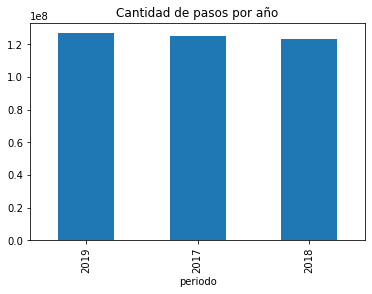

In [31]:
cantidad_año = dataset_completo.groupby(by='periodo')['cantidad_pasos'].sum().sort_values(ascending=False).plot(
    kind='bar',title = 'Cantidad de pasos por año')

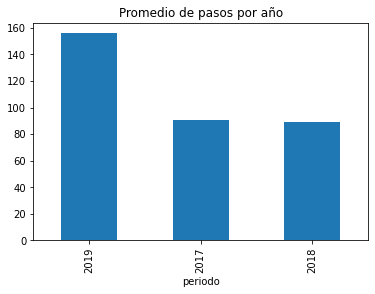

In [32]:
cantidad_año_avg = dataset_completo.groupby(by='periodo')['cantidad_pasos'].mean().sort_values(ascending=False).plot(
    kind='bar',title = 'Promedio de pasos por año')

In [33]:
# Detalle estadistico de los datos
dataset_completo[['periodo', 'cantidad_pasos']].groupby(['periodo']).describe()

cantidad_pasos                                                      
                 count        mean         std  min  25%   50%   75%     max
periodo                                                                     
2017         1372645.0   90.943755  301.638176  1.0  2.0   7.0  28.0  4271.0
2018         1375908.0   89.463607  291.090737  1.0  2.0   6.0  26.0  5722.0
2019          812153.0  156.018047  387.348842  1.0  4.0  15.0  72.0  6677.0

La mayor cantidad de pasos y pasos promedio de automóviles por año está en el 2019, seguido de 2017 y 2018. En el resumen estadístico anterior podemos observar que en el año 2019 tenemos la menor cantidad de registros que en los años 2017 y 2018, sin embargo el promedio de la cantidad de autos es mayor como se puede observar de igual forma en las gráficas.

In [34]:
mes_completo=dataset_completo.groupby(by=["num_mes"]).cantidad_pasos.sum().sort_values(ascending=False)
mes_completo = pd.DataFrame(mes_completo)
mes_completo

cantidad_pasos
num_mes                
10             33236614
11             32766604
8              32597920
12             32511272
7              31676894
9              31656177
3              31642432
5              31509291
6              30197868
1              29778381
4              29752986
2              27311268

In [35]:
mes_completo.reset_index(drop=False, inplace=True)
mes_completo

num_mes  cantidad_pasos
0        10        33236614
1        11        32766604
2         8        32597920
3        12        32511272
4         7        31676894
5         9        31656177
6         3        31642432
7         5        31509291
8         6        30197868
9         1        29778381
10        4        29752986
11        2        27311268

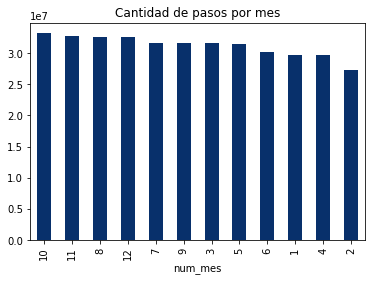

In [36]:
cantidad_mes = dataset_completo.groupby(by='num_mes')['cantidad_pasos'].sum().sort_values(ascending=False).plot(
    kind='bar',title = 'Cantidad de pasos por mes', cmap="Blues_r")

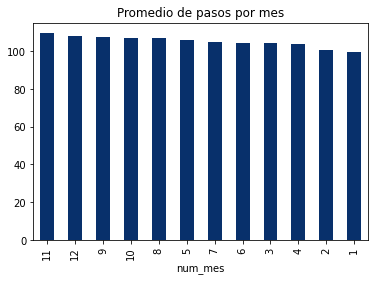

In [37]:
promedio_mes = dataset_completo.groupby(by='num_mes')['cantidad_pasos'].mean().sort_values(ascending=False).plot(
    kind='bar',title = 'Promedio de pasos por mes', cmap="Blues_r")

La mayor cantidad de pasos corresponden al mes de Octubre, en cambio si observamos el promedio el mes de Noviembre es el que tiene la cantidad más alta de pasos, sin embargo la mayor cantidad tanto como en la suma y el promedio se encuentra dentro del último trimestre del año, en los meses de Octubre, Noviembre y Diciembre, mientras que los mas bajos son Enero, Febrero y Abril. 

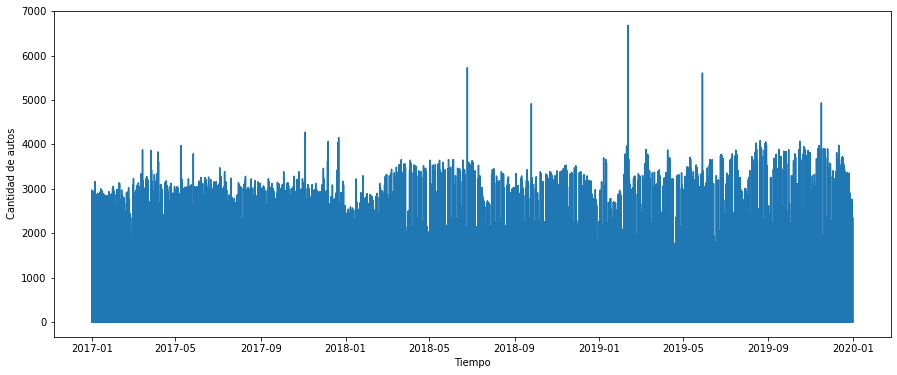

In [38]:
#Graficamos nuestros datos, tal como están para el dataset completo
plt.figure(figsize = (15,6))
plt.plot(dataset_completo.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.show()

En esta visualización de todos los datos sin resampleo no es posible detectar información reelevante para nuestro análisis, se observan algunos outliers, sin embargo la información no es clara.

In [39]:
#Procedemos a realizar un resampleo de los datos con frecuancia diaria
diario_completo = dataset_completo.resample('D', on = 'fecha').sum()
print(diario_completo.shape)
diario_completo.head()

(1095, 5)


periodo  hora_inicio  hora_fin  cantidad_pasos  num_mes
fecha                                                              
2017-01-01  5349084        34840     36652          220443     2652
2017-01-02  7823943        49400     50183          337393     3879
2017-01-03  7793688        48898     49570          342942     3864
2017-01-04  7890504        50198     51086          355057     3912
2017-01-05  7979252        50547     51527          367739     3956

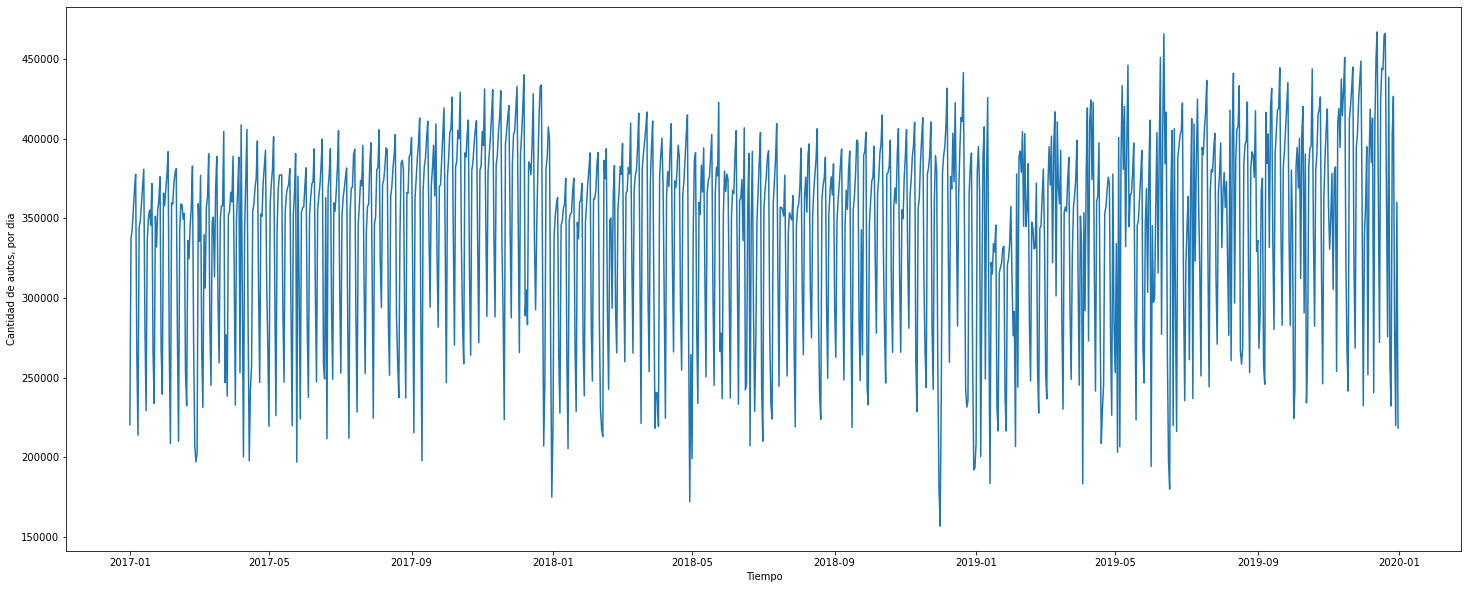

In [40]:
#Graficamos nuevamente con el resampleo diario
plt.figure(figsize = (25,10))
plt.plot(diario_completo.index, diario_completo.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

En la gráfica anterior podemos observar un patron en la serie, en la cual encontramos que los días que tienen un mayor flujo vehicular se encuentran en el último periodo de cada año, tal como observabamos en las gráficas anteriores, mientras que al inicio de cada año la cantidad de pasos disminuye, como podemos observar en los puntos 2018-01, 2019-01. 

In [41]:
#Vamos a realizar un resampleo mensual de los datos para ver y comprobar con mayor detalle este comportamiento
mensual_completo = dataset_completo.resample('M', on = 'fecha').sum()
print(mensual_completo.shape)
mensual_completo

(36, 5)


periodo  hora_inicio  hora_fin  cantidad_pasos  num_mes
fecha                                                                
2017-01-31  235474665      1488442   1508875        10059298   116745
2017-02-28  211982666      1342043   1356565         8825599   210196
2017-03-31  239298897      1522703   1541552        10237044   355923
2017-04-30  221160016      1407667   1424243         9764941   438592
2017-05-31  234433893      1494529   1512814        10279229   581145
2017-06-30  229328866      1460512   1478522        10181601   682188
2017-07-31  234129326      1487682   1505960        10421643   812546
2017-08-31  233427410      1487394   1508156        10810670   925840
2017-09-30  228885126      1457066   1475600        10752454  1021302
2017-10-31  237195166      1507656   1526902        11259159  1175980
2017-11-30  231672620      1466308   1486992        11264361  1263460
2017-12-31  231636314      1461184   1478082        10977491  1378104
2018-01-31  235357322      1488587   1508208        10038021   116629
2018-02-28  213859568      1352954   1367250         9206000   211952
2018-03-31  238842408      1516484   1537112        10809046   355068
2018-04-30  226768714      1444198   1462995        10135667   449492
2018-05-31  234320070      1491925   1511680        10518753   580575
2018-06-30  219068026      1391379   1410224         9914701   651342
2018-07-31  233426096      1485327   1504999        10215822   809704
2018-08-31  239766652      1525368   1547942        10683620   950512
2018-09-30  225128080      1430299   1450179        10023512  1004040
2018-10-31  244930714      1556443   1579032        10901629  1213730
2018-11-30  230711886      1457012   1478939        10212888  1257597
2018-12-31  234402808      1482683   1501279        10434033  1393872
2019-01-31  133813263       845349    851746         9681062    66277
2019-02-28  121376223       764732    770585         9279669   120234
2019-03-31  134812668       853587    862135        10596342   200316
2019-04-30  130637376       826101    833157         9852378   258816
2019-05-31  132872409       841790    849689        10711309   329055
2019-06-30  135559698       860590    866820        10101566   402852
2019-07-31  142563609       902366    909857        11039429   494277
2019-08-31  142315272       900497    908945        11103630   563904
2019-09-30  139274658       880890    887784        10880211   620838
2019-10-31  143556957       907384    915295        11075826   711030
2019-11-30  140738433       891085    898584        11289355   766777
2019-12-31  142216341       896164    903579        11099748   845268

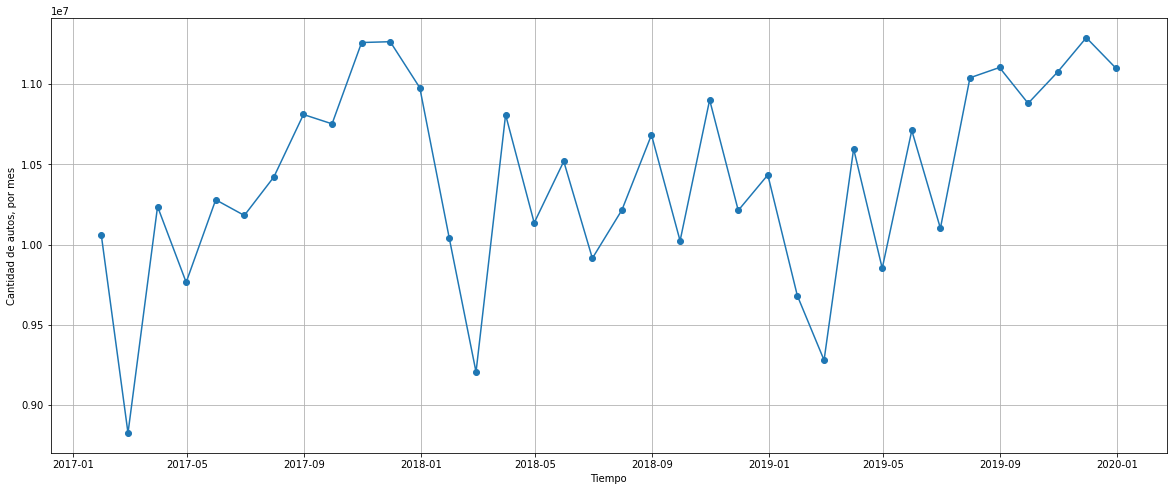

In [42]:
plt.figure(figsize = (20,8))
plt.plot(mensual_completo.index, mensual_completo.cantidad_pasos, marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.grid(True)
plt.show()

En la gráfica de resampleo mensual podemos observar que los meses con menor flujo de vehiculos son para todos los años en el mes de febrero, esto puede una posibilidad de patrón de comportamiento del tráfico pero también se debe a que es el mes en el que hay menos días y por lo tanto tenemos menos datos en este periodo, por el contrario uno de los meses con más flujo vehicular es el mes de octubre, el cual se presenta como de los puntos más altos para todos los años, junto con el mes de noviembre, este ultimo trimestre del año es el más alto para todos los años.

In [43]:
#Realizaremos un resampleo trimestral de los datos
trimestre_completo = dataset_completo.resample('Q', on = 'fecha').sum()
print(trimestre_completo.shape)
trimestre_completo

(12, 5)


periodo  hora_inicio  hora_fin  cantidad_pasos  num_mes
fecha                                                                
2017-03-31  686756228      4353188   4406992        29121941   682864
2017-06-30  684922775      4362708   4415579        30225771  1701925
2017-09-30  696441862      4432142   4489716        31984767  2759688
2017-12-31  700504100      4435148   4491976        33501011  3817544
2018-03-31  688059298      4358025   4412570        30053067   683649
2018-06-30  680156810      4327502   4384899        30569121  1681409
2018-09-30  698320828      4440994   4503120        30922954  2764256
2018-12-31  710045408      4496138   4559250        31548550  3865199
2019-03-31  390002154      2463668   2484466        29557073   386827
2019-06-30  399069483      2528481   2549666        30665253   990723
2019-09-30  424153539      2683753   2706586        33023270  1679019
2019-12-31  426511731      2694633   2717458        33464929  2323075

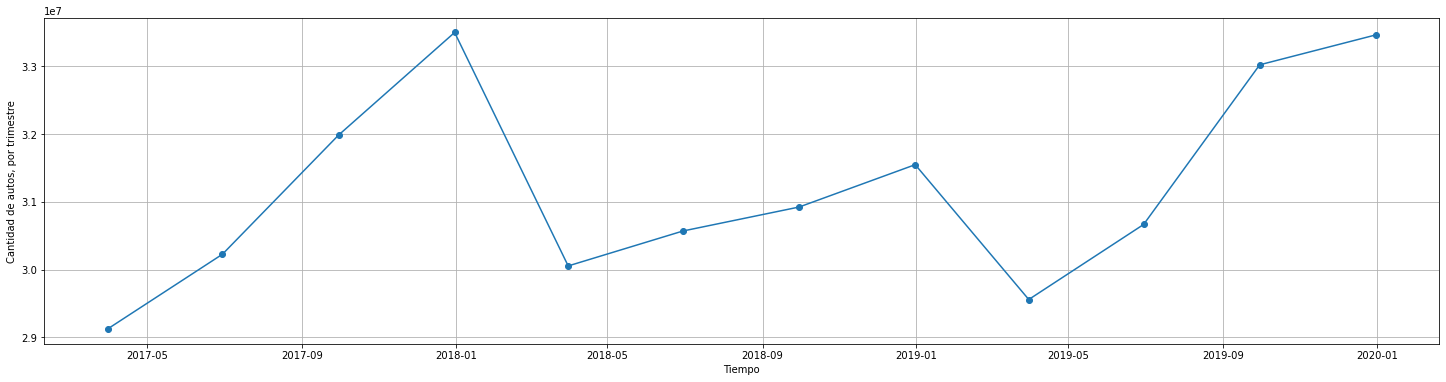

In [44]:
plt.figure(figsize = (25,6))
plt.plot(trimestre_completo.index, trimestre_completo.cantidad_pasos, marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por trimestre')
plt.grid(True)
plt.show()

En la gráfica anterior podemos observar como efectivamente en cada año, el último trimestre es cuando se tiene mayor flujo vehicular y lleva una tendencia creciente a lo largo de cada año.

In [45]:
#Por último realizaremos un resampleo semanal
semanal_completo = dataset_completo.resample('W', on = 'fecha').sum()
print(semanal_completo.shape)
semanal_completo

(158, 5)


periodo  hora_inicio  hora_fin  cantidad_pasos  num_mes
fecha                                                               
2017-01-01   5349084        34840     36652          220443     2652
2017-01-08  52986590       335204    339826         2260596    26270
2017-01-15  53160052       335647    339563         2314268    26356
2017-01-22  53769186       339724    343726         2257919    26658
2017-01-29  54039464       340745    345313         2282364    26792
...              ...          ...       ...             ...      ...
2019-12-08  31379298       198612    200666         2533762   186504
2019-12-15  33071220       208660    210040         2613146   196560
2019-12-22  33406374       210744    212314         2882347   198552
2019-12-29  31550913       198359    200546         2259814   187524
2020-01-05   8932056        55806     56126          578292    53088

[158 rows x 5 columns]

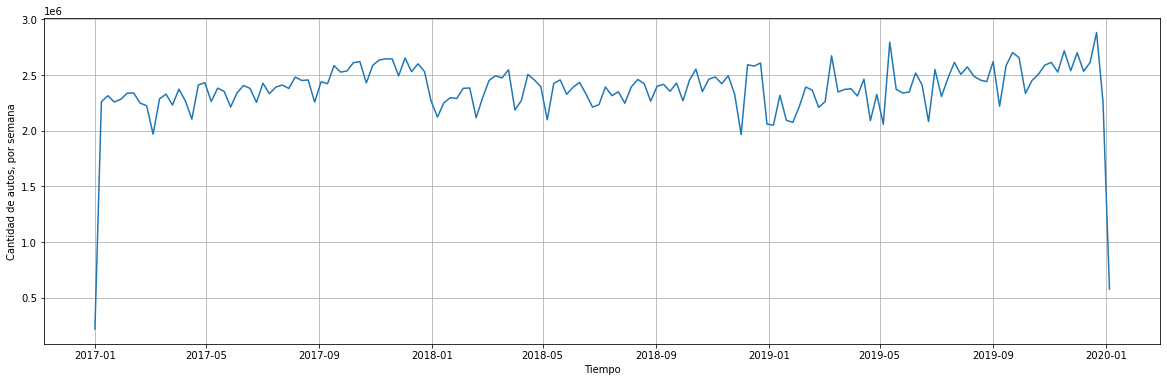

In [46]:
plt.figure(figsize = (20,6))
plt.plot(semanal_completo.index, semanal_completo.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.grid(True)
plt.show()

En el grafico semanal se observa levemente el comportamiento que vimos anteriormente, sin embargo los datons oscilan entre un mismo rango.

**Pregunta 1.  ¿Cuáles son los días y horarios de mayor tráfico?** 

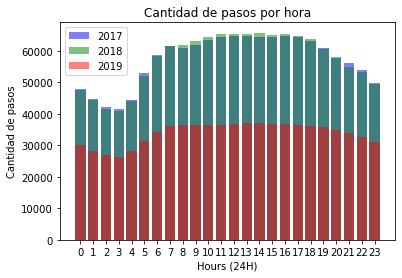

In [47]:
hours = (np.arange(24))
y_pos = np.arange(len(hours))
pasos = dataset_completo[dataset_completo['periodo']==2017].groupby('hora_fin').size()
plt.bar(y_pos, pasos, align='center', alpha=0.5, color='b')
pasos = dataset_completo[dataset_completo['periodo']==2018].groupby('hora_fin').size()
plt.bar(y_pos, pasos, align='center', alpha=0.5,color='g')
pasos = dataset_completo[dataset_completo['periodo']==2019].groupby('hora_fin').size()
plt.bar(y_pos, pasos, align='center', alpha=0.5,color='r')
plt.xticks(y_pos, hours)
plt.xlabel('Hours (24H)')
plt.ylabel('Cantidad de pasos')
plt.title('Cantidad de pasos por hora')
plt.legend(['2017','2018','2019'])
plt.show()

En la gráfica anterior podemos observar que el horario con mayor tráfico es entre las 10:00 am y las 4:00 pm, la cantidad de vehiculos circulando empieza a incrementar a partir de las 4:00 am y va disminuyendo después de las 7:00pm aproximadamente que es cuando terminan las jornadas laborales y actividades del día a día. El horario con menor cantidad de flujod e vehiculos es entre la 1:00 am y las 3:00 am. 

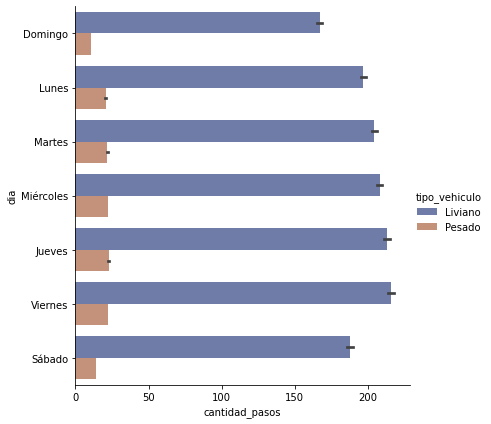

In [48]:
import seaborn as sns
por_dia = sns.catplot(data=dataset_completo, kind="bar", x="cantidad_pasos", y="dia", hue="tipo_vehiculo", palette="dark", 
                alpha=.6, height=6)

En la gráfica anterior observamos que el día con mayor flujo de vehiculos es el miercoles, jueves y viernes mientras que los días con menor tráfico son los sábados y domingos, la distribución es igual para los autos livianos y pesados, ambos circulan más entre semana, ya que son los días laborables.

**Pregunta 2.  ¿Cuáles son los tipos de vehiculos que circulan más y en que estación?** 

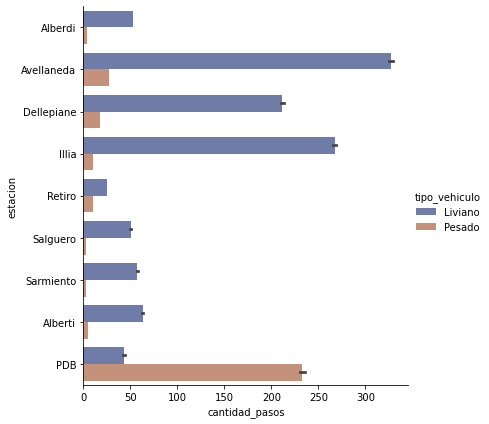

In [51]:
por_estacion = sns.catplot(data=dataset_completo, kind="bar", x="cantidad_pasos", y="estacion", hue="tipo_vehiculo", palette="dark", 
                alpha=.6, height=6)

**Pregunta 3.  ¿Cuál es el tipo de pago más utilizado a lo largo del tiempo?** 

In [52]:
dataset_pago =  dataset_completo[['fecha','periodo', 'dia','cantidad_pasos','forma_pago']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'),'periodo', 'dia','forma_pago'])\
        .sum().reset_index()
dataset_pago

fecha  periodo      dia       forma_pago  cantidad_pasos
0    2017-01-01     2017  Domingo         EFECTIVO          157472
1    2017-01-01     2017  Domingo           EXENTO            1638
2    2017-01-01     2017  Domingo       INFRACCION             670
3    2017-01-01     2017  Domingo         MONEDERO               1
4    2017-01-01     2017  Domingo       NO COBRADO            5756
...         ...      ...      ...              ...             ...
6554 2019-12-31     2019   Martes           EXENTO            1817
6555 2019-12-31     2019   Martes       INFRACCION            1902
6556 2019-12-31     2019   Martes       NO COBRADO           10375
6557 2019-12-31     2019   Martes  T. DISCAPACIDAD            1334
6558 2019-12-31     2019   Martes         TELEPASE           98603

[6559 rows x 5 columns]

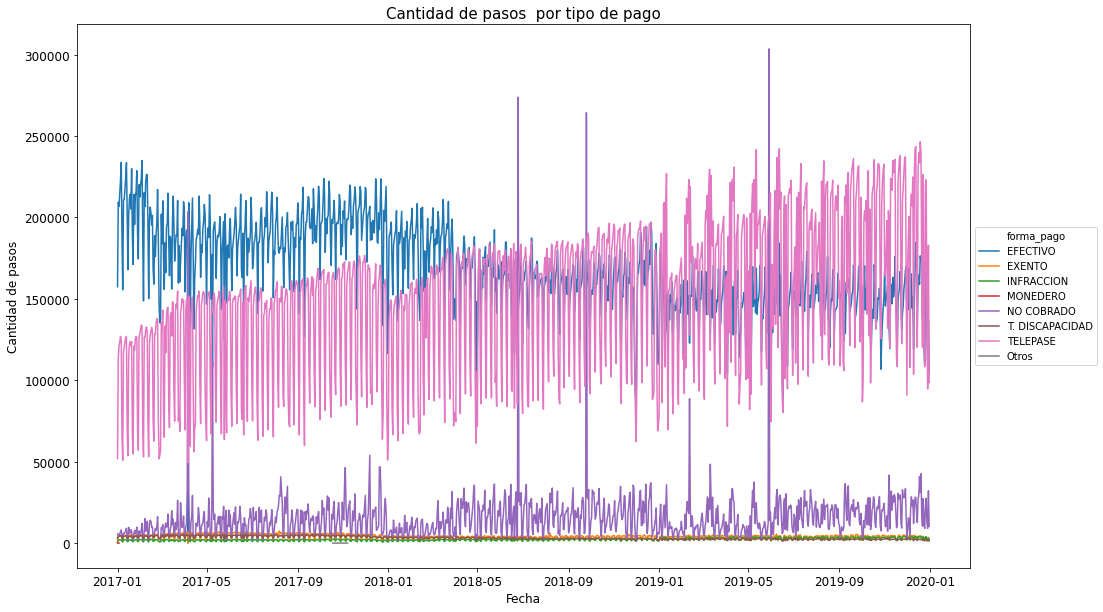

In [53]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_pago, x='fecha', y='cantidad_pasos', hue="forma_pago")

#Formato de la gráfica
plt.title('Cantidad de pasos  por tipo de pago',fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=12)
plt.show()

Al inicio de 2017 el tipo de pago más utilizado fue EFECTIVO pero a partir de la mitad del año 2018 el pago por TELEPASE incrementó siendo el mas utilizado hasta finales de 2019. 

### Exploración de los datos (Estación Illia y pago Efectivo)

In [54]:
dataset_filtro.head()

periodo      fecha  hora_inicio  hora_fin      dia estacion sentido  \
1750     2017 2017-01-01           24         1  Domingo    Illia  Centro   
1755     2017 2017-01-01            1         2  Domingo    Illia  Centro   
1757     2017 2017-01-01            1         2  Domingo    Illia  Centro   
1761     2017 2017-01-01            1         2  Domingo    Illia  Centro   
1764     2017 2017-01-01            2         3  Domingo    Illia  Centro   

     tipo_vehiculo forma_pago  cantidad_pasos  num_mes  
1750       Liviano   EFECTIVO               1        1  
1755       Liviano   EFECTIVO              10        1  
1757       Liviano   EFECTIVO             783        1  
1761        Pesado   EFECTIVO               3        1  
1764       Liviano   EFECTIVO              14        1

In [55]:
dataset_filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 1750 to 812131
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   periodo         238869 non-null  int64         
 1   fecha           238869 non-null  datetime64[ns]
 2   hora_inicio     238869 non-null  int64         
 3   hora_fin        238869 non-null  int64         
 4   dia             238869 non-null  object        
 5   estacion        238869 non-null  object        
 6   sentido         238869 non-null  object        
 7   tipo_vehiculo   238869 non-null  object        
 8   forma_pago      238869 non-null  object        
 9   cantidad_pasos  238869 non-null  int64         
 10  num_mes         238869 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 21.9+ MB


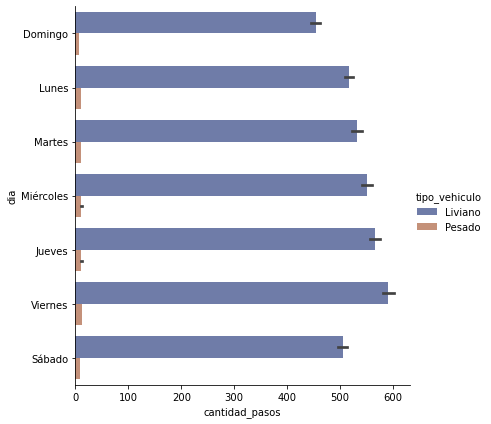

In [56]:
dia_filtro = sns.catplot(data=dataset_filtro, kind="bar", x="cantidad_pasos", y="dia", hue="tipo_vehiculo", palette="dark", 
                alpha=.6, height=6)

En el gráfico anterior podemos observar que los días con mayor tráfico se siguen manteniendo iguales a los del dataset completo, siendo jueves y viernes los de mayor tráfico y fines de semana los de menor tráfico.

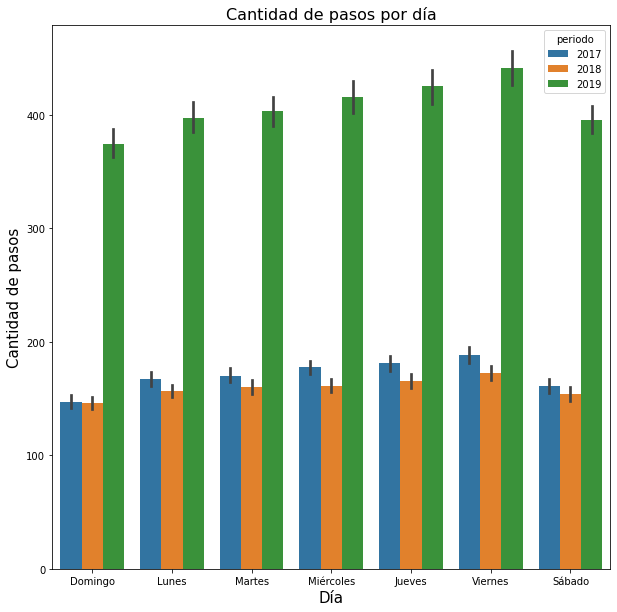

In [57]:
plt.figure(figsize=(10, 10))
sns.barplot(x="dia", y="cantidad_pasos", hue='periodo', data=dataset_filtro)
plt.title('Cantidad de pasos por día',fontsize=16)
plt.xlabel('Día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.show()

En la gráfica anterior observar como ese comportamiento es igual para los años 2017, 2018 y 2019.

In [58]:
# Detalle estadistico de los datos
dataset_filtro[['periodo', 'cantidad_pasos']].groupby(['periodo']).describe()

cantidad_pasos                                                        
                 count        mean         std  min   25%   50%    75%     max
periodo                                                                       
2017          104230.0  170.617979  391.118214  1.0   2.0   9.0   58.0  2416.0
2018           99996.0  159.675827  353.455808  1.0   2.0   7.0   58.0  1935.0
2019           34643.0  407.445227  500.036433  1.0  14.0  60.0  834.0  2004.0

En el análisis estadístico podemos observar que en este dataset filtrado se presenta el mismo comportamiento que en el completo, el año 2019 tiene la menor cantidad de instancias pero su promedio de pasos de automóviles es mayor al de los demas años. Con estos datos podemos observar que en promedio circularon más automoviles en el año 2019, seguido del año 2017 y por último el 2018. El valor minimo para todos los aos es de 1, esto probablemente se trata de outliers, los cuales se van a analizar más adelante, mientras que el valor máximo se encuentra en el año 2017.

In [59]:
#Quitamos las columnas que no vamos a utilizar, ya que son las mismas para todo el dataset
dataset_filtro =dataset_filtro.drop(['forma_pago', 'estacion'], axis = 1)
dataset_filtro.head()

periodo      fecha  hora_inicio  hora_fin      dia sentido  \
1750     2017 2017-01-01           24         1  Domingo  Centro   
1755     2017 2017-01-01            1         2  Domingo  Centro   
1757     2017 2017-01-01            1         2  Domingo  Centro   
1761     2017 2017-01-01            1         2  Domingo  Centro   
1764     2017 2017-01-01            2         3  Domingo  Centro   

     tipo_vehiculo  cantidad_pasos  num_mes  
1750       Liviano               1        1  
1755       Liviano              10        1  
1757       Liviano             783        1  
1761        Pesado               3        1  
1764       Liviano              14        1

In [60]:
#Comprobamos que no hay datos nulos
dataset_filtro.isnull().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
num_mes           0
dtype: int64

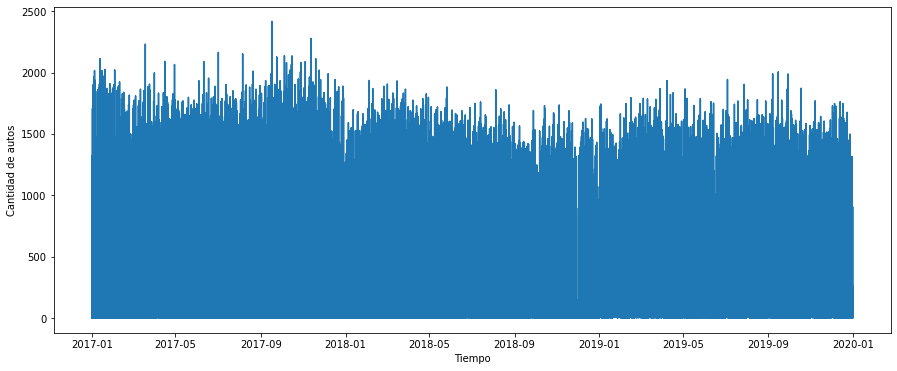

In [61]:
# Graficamos la serie de tiempo de la estación Illia y tipo de pago Efectivo
plt.figure(figsize = (15,6))
plt.plot(dataset_filtro.fecha, dataset_filtro.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.show()

In [62]:
#Realizamos un resampleo de los datos con frecuencia diaria 
diario_filtro = dataset_filtro.resample('D', on = 'fecha').sum()
#Realizamos un resampleo de los datos con frecuencia mensual
mensual_filtro = dataset_filtro.resample('MS', on = 'fecha').sum()
#Realizamos un resampleo de los datos con frecuencia trimestral
trimestral_filtro = dataset_filtro.resample('Q', on = 'fecha').sum()
#Realizamos un resampleo de los datos con frecuencia semanal
semanal_filtro = dataset_filtro.resample('W', on = 'fecha').sum()

Text(0, 0.5, 'Cantidad de pasos')

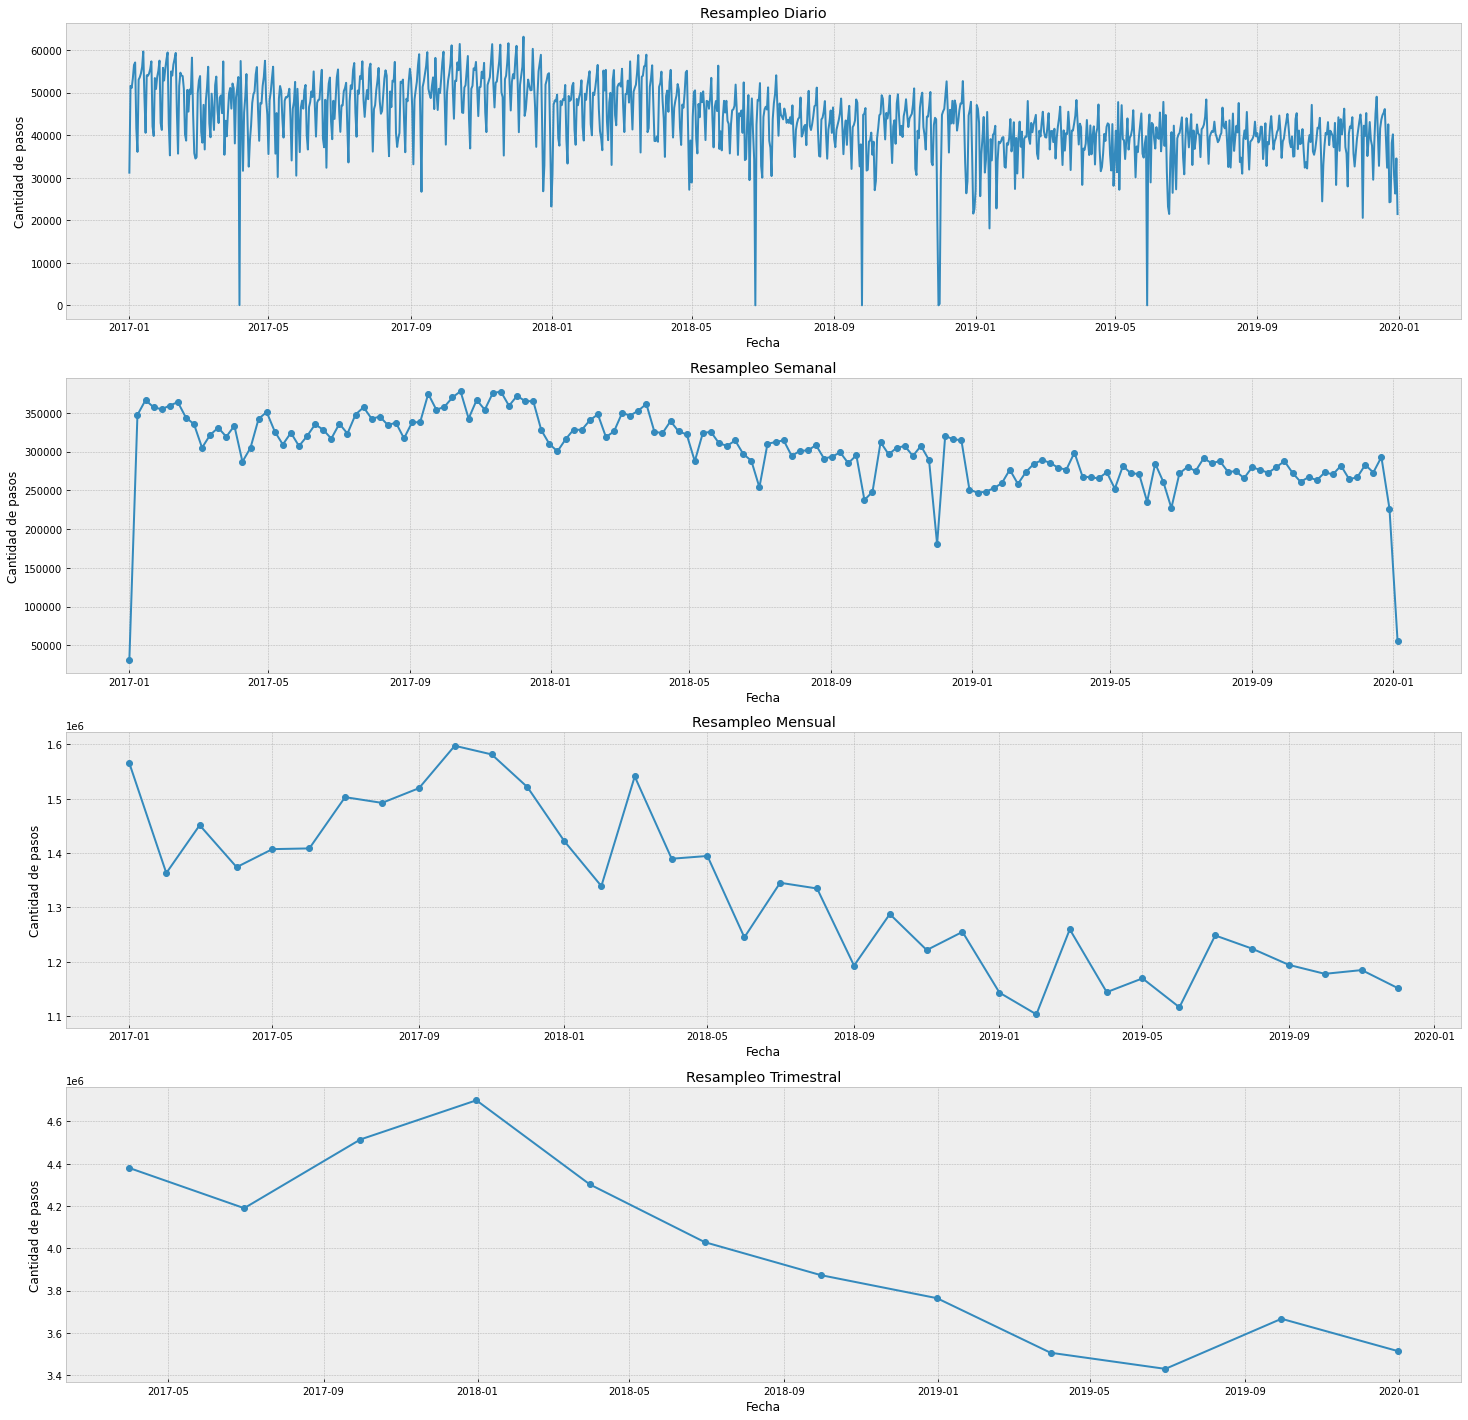

In [63]:
fig = plt.figure(figsize=(25,25))
plt.style.use('bmh')

ax1 = plt.subplot(4,1,1)
ax1 = plt.plot(diario_filtro.index, diario_filtro.cantidad_pasos)
plt.title('Resampleo Diario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')


ax2 = plt.subplot(4,1,2)
ax2 = plt.plot(semanal_filtro.index, semanal_filtro.cantidad_pasos, marker='o')
plt.title('Resampleo Semanal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

ax2 = plt.subplot(4,1,3)
ax2 = plt.plot(mensual_filtro.index, mensual_filtro.cantidad_pasos, marker='o')
plt.title('Resampleo Mensual')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

ax2 = plt.subplot(4,1,4)
ax2 = plt.plot(trimestral_filtro.index, trimestral_filtro.cantidad_pasos, marker='o')
plt.title('Resampleo Trimestral')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

En las gráficas anteriores podemos ver el comportamiento de los datos con diferentes ventanas de tiempo, en el resampleo diario podemos ver que la camtidad de pasos esta entre los 20,000 y 60,000 pasos y podemos observar algunos valores atípicos que se acercan al valor 0. En el resampleo semanal podemos ver que hay una ligera tendencia a la baja, sin embargo los puntos suben y bajan ya que como vimos en gráficas anteriores la cantidad de tráfico tiene un patrón ciclico cada semana en el que se incrementa los dias lunes al viernes y los fines de semana disminuyen, en el resampleo mensual y trimestral se hace más evidente la tendencia a la baja.

### **Valores atípicos**

In [64]:
dataset_filtro

periodo      fecha  hora_inicio  hora_fin      dia    sentido  \
1750       2017 2017-01-01           24         1  Domingo     Centro   
1755       2017 2017-01-01            1         2  Domingo     Centro   
1757       2017 2017-01-01            1         2  Domingo     Centro   
1761       2017 2017-01-01            1         2  Domingo     Centro   
1764       2017 2017-01-01            2         3  Domingo     Centro   
...         ...        ...          ...       ...      ...        ...   
812010     2019 2019-12-31           21        22   Martes  Provincia   
812016     2019 2019-12-31           21        22   Martes  Provincia   
812080     2019 2019-12-31           22        23   Martes     Centro   
812085     2019 2019-12-31           22        23   Martes  Provincia   
812131     2019 2019-12-31           23        24   Martes     Centro   

       tipo_vehiculo  cantidad_pasos  num_mes  
1750         Liviano               1        1  
1755         Liviano              10        1  
1757         Liviano             783        1  
1761          Pesado               3        1  
1764         Liviano              14        1  
...              ...             ...      ...  
812010       Liviano             556       12  
812016        Pesado               1       12  
812080       Liviano             214       12  
812085       Liviano             190       12  
812131       Liviano               4       12  

[238869 rows x 9 columns]

In [65]:
dataset_filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 1750 to 812131
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   periodo         238869 non-null  int64         
 1   fecha           238869 non-null  datetime64[ns]
 2   hora_inicio     238869 non-null  int64         
 3   hora_fin        238869 non-null  int64         
 4   dia             238869 non-null  object        
 5   sentido         238869 non-null  object        
 6   tipo_vehiculo   238869 non-null  object        
 7   cantidad_pasos  238869 non-null  int64         
 8   num_mes         238869 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 28.2+ MB


In [66]:
#Creamos un dataset con agrupación diaria que contenga todos las columnas
df_filtro_diario =  dataset_filtro[['fecha','periodo','num_mes', 'dia','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'),'periodo','num_mes', 'dia'])\
        .sum().reset_index()
df_filtro_diario

fecha  periodo  num_mes        dia  cantidad_pasos
0    2017-01-01     2017        1    Domingo           31183
1    2017-01-02     2017        1      Lunes           51568
2    2017-01-03     2017        1     Martes           51093
3    2017-01-04     2017        1  Miércoles           53332
4    2017-01-05     2017        1     Jueves           56486
...         ...      ...      ...        ...             ...
1086 2019-12-27     2019       12    Viernes           40182
1087 2019-12-28     2019       12     Sábado           30681
1088 2019-12-29     2019       12    Domingo           26259
1089 2019-12-30     2019       12      Lunes           34523
1090 2019-12-31     2019       12     Martes           21447

[1091 rows x 5 columns]

In [67]:
#Para poder realizar el análisis de outliers con Moving Average pasamos la columna fecha como index y dejamos solo la columna de cantidad de pasos
outliers_analisis =  df_filtro_diario[['fecha','cantidad_pasos']].set_index('fecha')
outliers_analisis

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
...                    ...
2019-12-27           40182
2019-12-28           30681
2019-12-29           26259
2019-12-30           34523
2019-12-31           21447

[1091 rows x 1 columns]

In [68]:
from sklearn.metrics import mean_absolute_error

In [69]:
#Detección de valores atípicos con función de media movil
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    global rolling_mean
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(20,10))
    plt.plot(series[window:], label="Actual values")
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "yellow", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale *1.5* deviation)
        upper_bond = rolling_mean + (mae + scale *1.5* deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            global anomalies
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    
    plt.legend(loc="upper left")
    plt.grid(True)

In [70]:
outliers_analisis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1091 entries, 2017-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cantidad_pasos  1091 non-null   int64
dtypes: int64(1)
memory usage: 17.0 KB


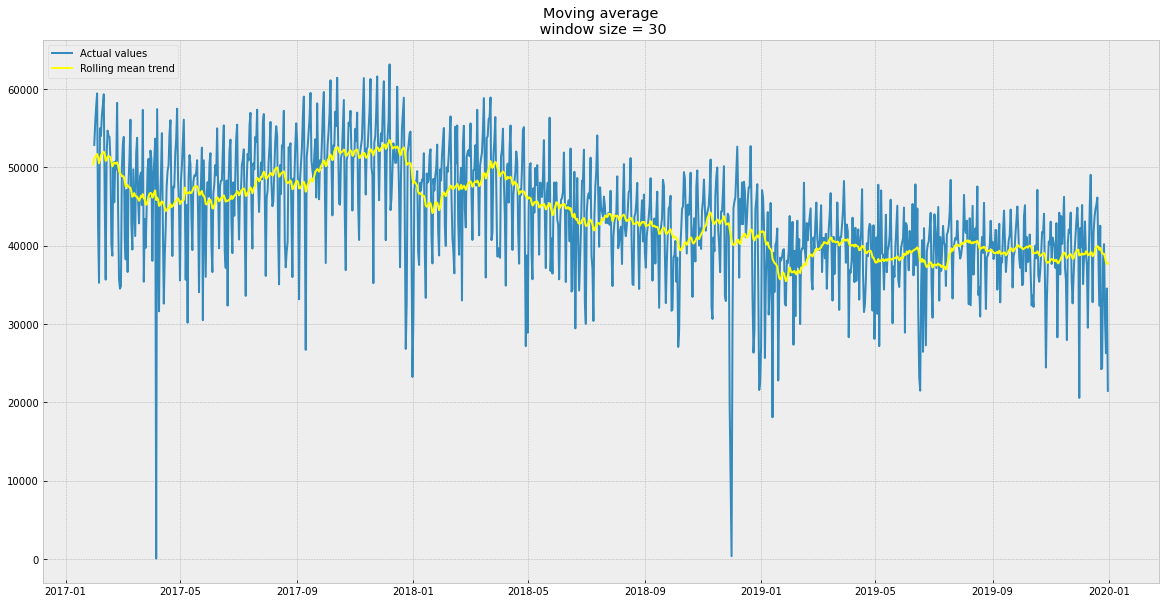

In [71]:
plotMovingAverage(outliers_analisis, 30)

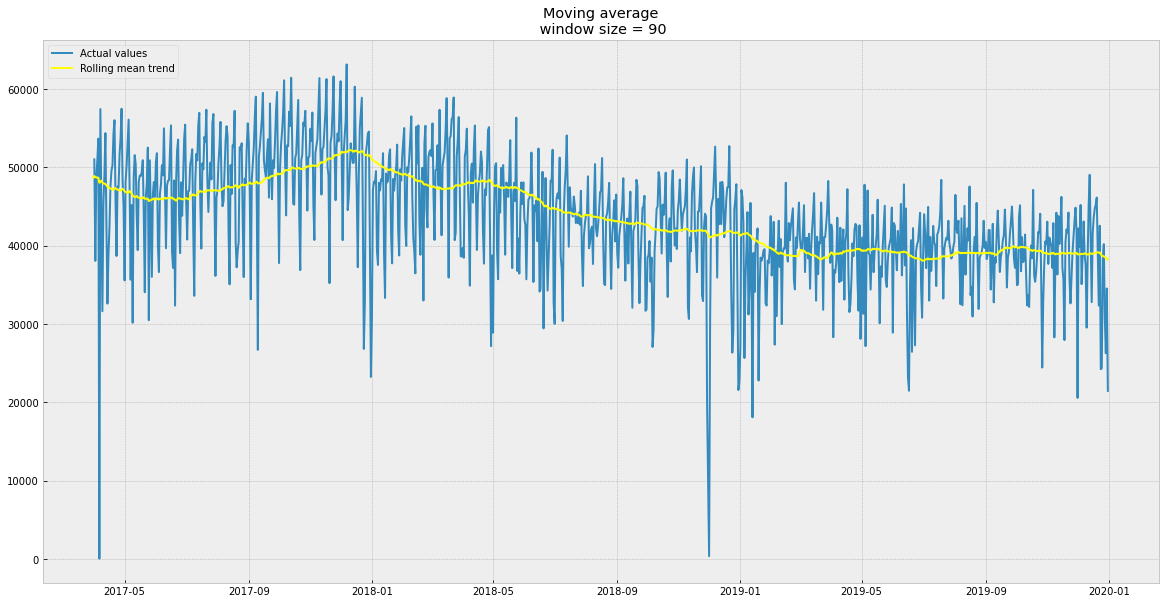

In [72]:
plotMovingAverage(outliers_analisis, 90)

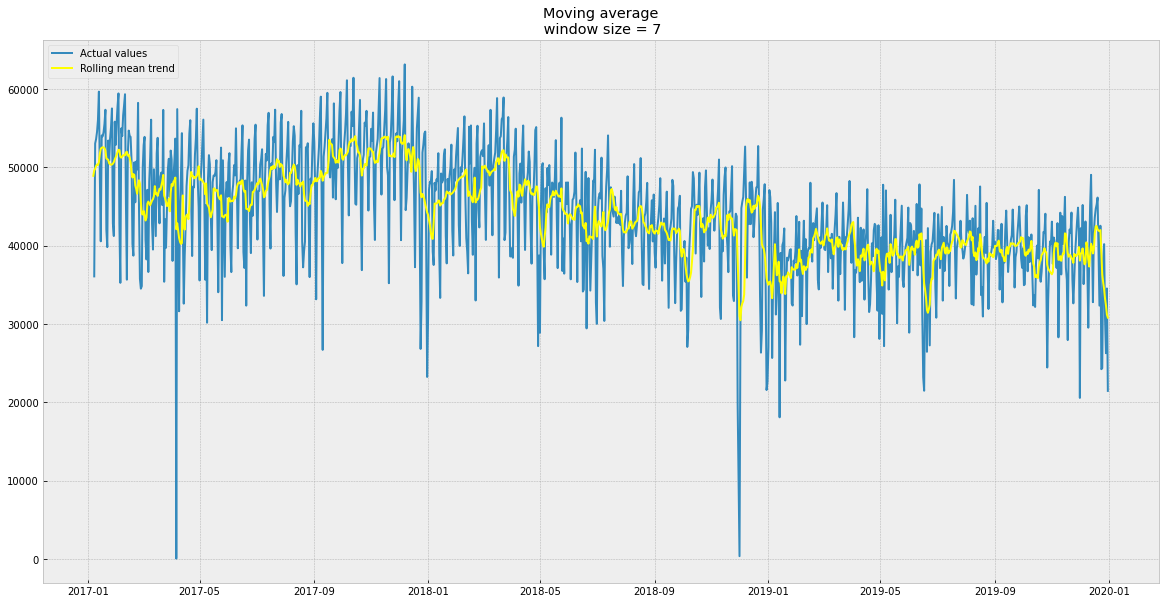

In [73]:
#Seleccionamos enl promedio movil con ventana de tiempo de 7 días (1 semana), ya que con esta ventana podemos ver un promedio móvil más 
#definido y en congruencia con el movimiento de los datos reales a traves del tiempo.
plotMovingAverage(outliers_analisis, 7)

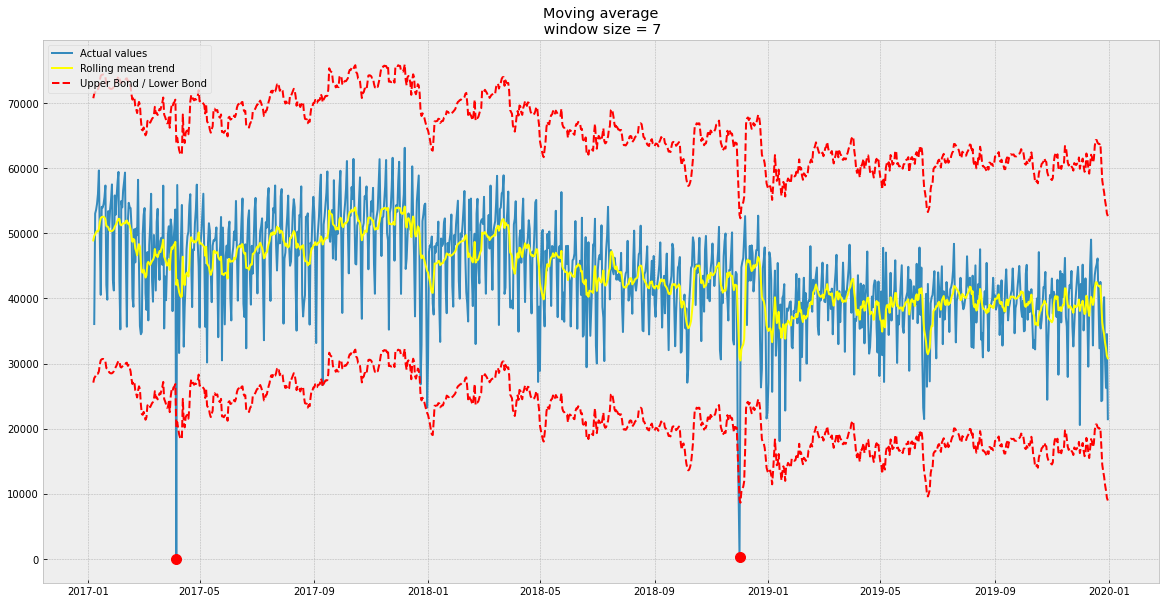

In [74]:
#Graficamos enl promedio movil con la detección de las anomalias dependiendo de los límites de desviación (1.5) que definimos en la función
plotMovingAverage(outliers_analisis, 7, plot_intervals=True, plot_anomalies=True)

En el gráfico anterior se pueden observar que existen 2 valores outliers, los cuales tienen valores muy pequeños cercanos a 0.

In [75]:
#La gráfica muestra 2 valores atípicos
anomalies.reset_index().dropna()

fecha cantidad_pasos
95  2017-04-06             40
696 2018-12-01            350

In [76]:
#Obtener los index donde se encuentran las anomalías
indx_anomalies = anomalies.reset_index().dropna().index
indx_anomalies

Int64Index([95, 696], dtype='int64')

In [77]:
#Identificar el index donde se encuentras las anomalias
outliers_analisis.cantidad_pasos.iloc[indx_anomalies]

fecha
2017-04-06     40
2018-12-01    350
Name: cantidad_pasos, dtype: int64

In [78]:
#Realizamos una copia del dataset con resampleo diario
df_filtro_no_otliers=df_filtro_diario.copy()
df_filtro_no_otliers

fecha  periodo  num_mes        dia  cantidad_pasos
0    2017-01-01     2017        1    Domingo           31183
1    2017-01-02     2017        1      Lunes           51568
2    2017-01-03     2017        1     Martes           51093
3    2017-01-04     2017        1  Miércoles           53332
4    2017-01-05     2017        1     Jueves           56486
...         ...      ...      ...        ...             ...
1086 2019-12-27     2019       12    Viernes           40182
1087 2019-12-28     2019       12     Sábado           30681
1088 2019-12-29     2019       12    Domingo           26259
1089 2019-12-30     2019       12      Lunes           34523
1090 2019-12-31     2019       12     Martes           21447

[1091 rows x 5 columns]

In [79]:
#Se obtiene el index de los valores atípicos para identificarlos
df_filtro_no_otliers.cantidad_pasos.iloc[indx_anomalies]

95      40
696    350
Name: cantidad_pasos, dtype: int64

In [80]:
# Se genera el promedio movil para los valores que se encontraron como atípicos
rolling_mean.reset_index().cantidad_pasos.iloc[indx_anomalies].map(lambda x: int(round(x,0)))

95     42084
696    30973
Name: cantidad_pasos, dtype: int64

In [81]:
#Se reemplazan los valores atipícos con el promedio movil
df_filtro_no_otliers.cantidad_pasos.iloc[indx_anomalies]=rolling_mean.reset_index().cantidad_pasos.iloc[indx_anomalies].map(lambda x: int(round(x,0)))
print(df_filtro_no_otliers.cantidad_pasos.iloc[95])
print(df_filtro_no_otliers.cantidad_pasos.iloc[696])

42084
30973


C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [82]:
df_filtro_no_otliers.head(5)

fecha  periodo  num_mes        dia  cantidad_pasos
0 2017-01-01     2017        1    Domingo           31183
1 2017-01-02     2017        1      Lunes           51568
2 2017-01-03     2017        1     Martes           51093
3 2017-01-04     2017        1  Miércoles           53332
4 2017-01-05     2017        1     Jueves           56486

In [83]:
# Se crea una copia para crear un dataset final y sin outliers 
df_illia_efectivo=df_filtro_no_otliers.copy()

In [84]:
df_final =  df_illia_efectivo[['fecha','cantidad_pasos']].set_index('fecha')
df_final

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
...                    ...
2019-12-27           40182
2019-12-28           30681
2019-12-29           26259
2019-12-30           34523
2019-12-31           21447

[1091 rows x 1 columns]

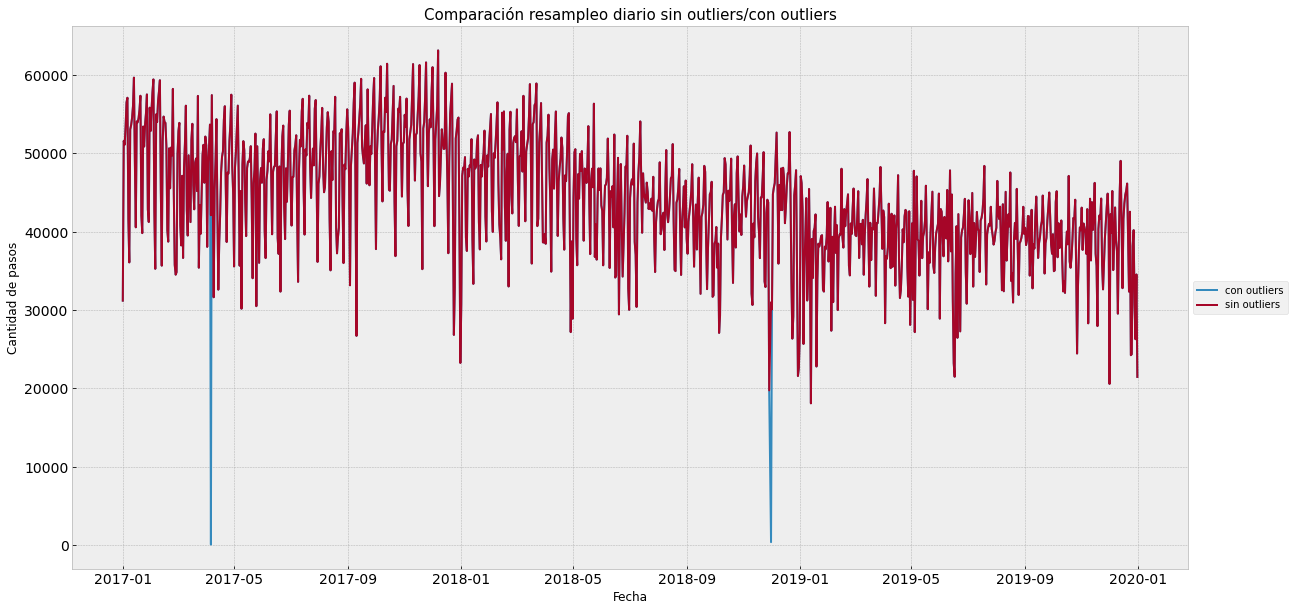

In [85]:
plt.figure(figsize=(20, 10))
plt.plot(outliers_analisis.index, outliers_analisis.cantidad_pasos, label="con outliers")
plt.plot(df_final.index, df_final.cantidad_pasos, label="sin outliers")
plt.title('Comparación resampleo diario sin outliers/con outliers',fontsize=15)
plt.xlabel('Fecha',fontsize=12)
plt.ylabel('Cantidad de pasos',fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

En la gráfica anterior podemos observar la comparación del dataset con resampleo diario con outliers contra el dataset sin outliers, se puede ver que los dos puntos que resaltaban cerca del valor cero ya no están. 

### **Componentes estacionales y tendencia de la serie**

In [86]:
df_final

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
...                    ...
2019-12-27           40182
2019-12-28           30681
2019-12-29           26259
2019-12-30           34523
2019-12-31           21447

[1091 rows x 1 columns]

In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1091 entries, 2017-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cantidad_pasos  1091 non-null   int64
dtypes: int64(1)
memory usage: 17.0 KB


In [88]:
#Resampleo SEMANAL, MENSUAL y TRIMESTRAL
semanal_ilia_efectivo = df_final.resample('W').sum()
mensual_ilia_efectivo = df_final.resample('M').sum()
cuatrimestre_ilia_efectivo = df_final.resample('Q').sum()

In [89]:

print(semanal_ilia_efectivo.shape)
print(mensual_ilia_efectivo.shape)
print(cuatrimestre_ilia_efectivo.shape)

(158, 1)
(36, 1)
(12, 1)


In [90]:
#Método aditivo
from statsmodels.tsa.seasonal import seasonal_decompose
result_semanal = seasonal_decompose(semanal_ilia_efectivo.cantidad_pasos, model='additive')
result_mensual = seasonal_decompose(mensual_ilia_efectivo.cantidad_pasos, model='additive')
result_cuatrimestre = seasonal_decompose(cuatrimestre_ilia_efectivo.cantidad_pasos, model='additive')

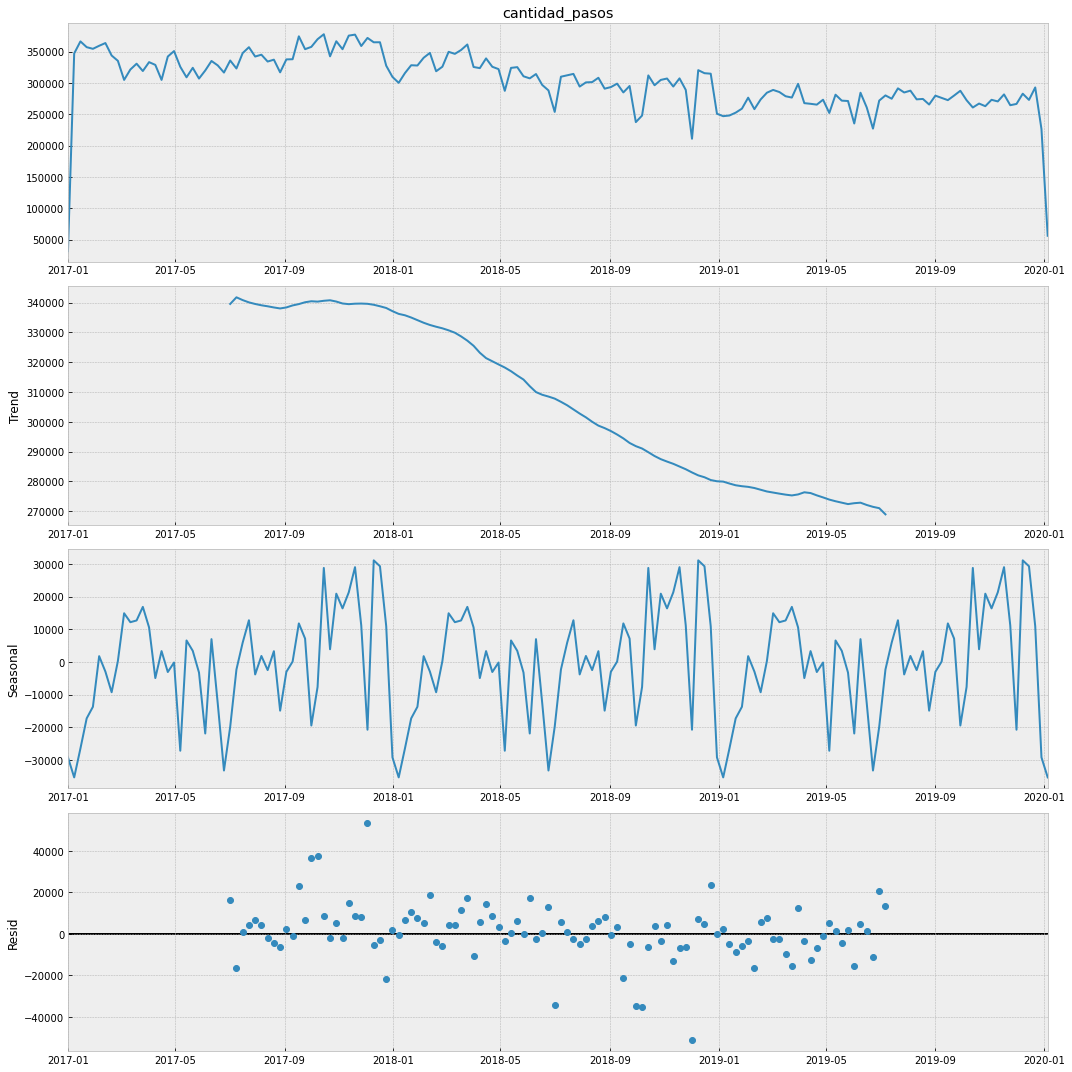

In [91]:
#SEMANAL ADITIVO
matplotlib.rcParams['figure.figsize'] = [15,15]
result_semanal.plot()
plt.show()

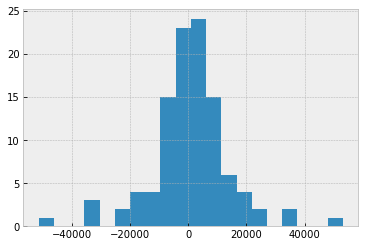

In [92]:
plt.figure(figsize = (6,4))
plt.hist(result_semanal.resid, bins = 20)
plt.show()

In [93]:
result_semanal

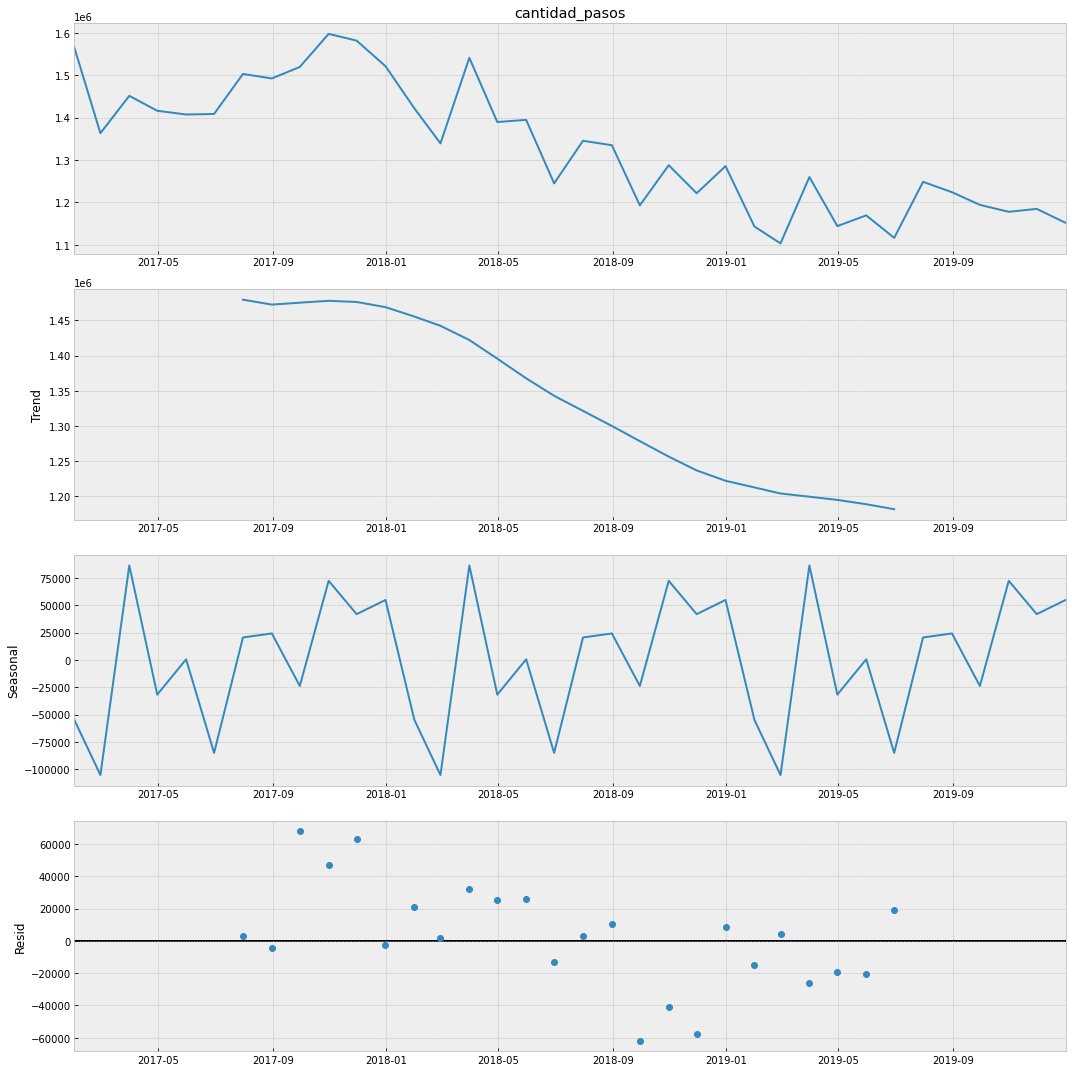

In [94]:
#MENSUAL
matplotlib.rcParams
result_mensual.plot()
plt.show()

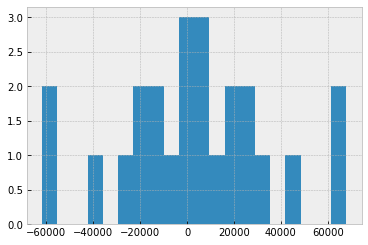

In [95]:
plt.figure(figsize = (6,4))
plt.hist(result_mensual.resid, bins = 20)
plt.show()

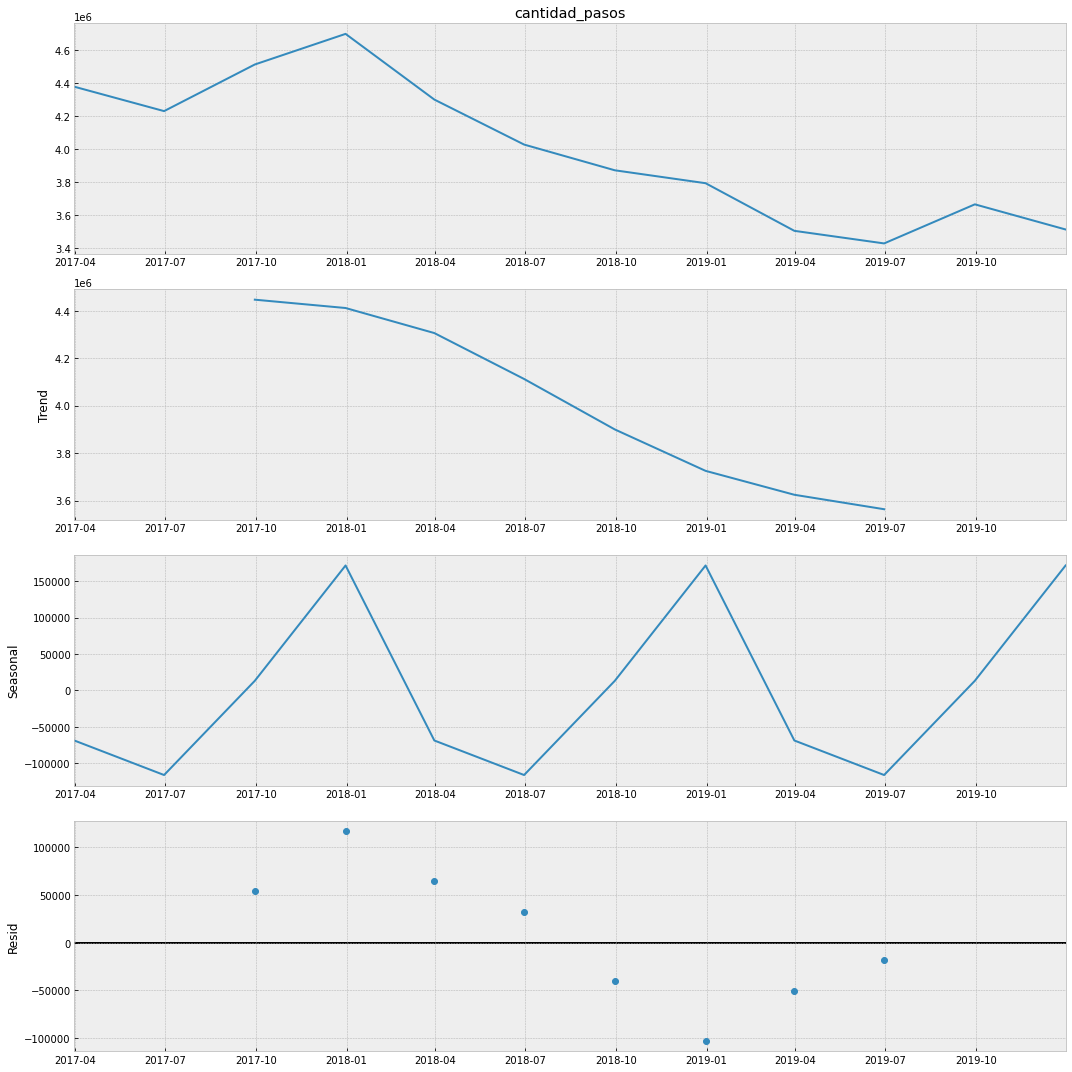

In [96]:
# CUATRIMESTRE
matplotlib.rcParams['figure.figsize'] = [15,15]
result_cuatrimestre.plot()
plt.show()

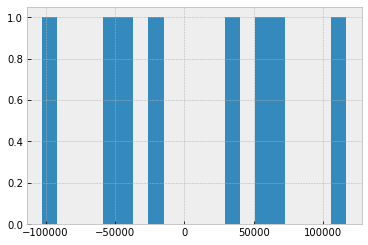

In [97]:
plt.figure(figsize = (6,4))
plt.hist(result_cuatrimestre.resid, bins = 20)
plt.show()

Observando el comportamiento de los datos en las distintas ventanas de tiempo que se crearon con método aditivo podemos observar una tendencia a la baja en la cantidad de pasos de automóviles, esto se pude deber principalmente a que en este dataset tenemos únicamente datos del tipo de pago de Efectivo, y como pudimos ver en las gráficas de exploración de datos los tipos de pago de efectivo fueron disminuyendo a lo largo del tiempo y el tipo de pago más frecuente en los últimos años fue el de telepase. También se puede observar en la gráfica de estacionalidad que se genera un patrón cíclico, esto quiere decir que la serie de tiempo es estacionaria. También podemos ver que el residuo en la gráfica con ventana semanal tiene una distribución normal.

In [98]:
#Método multiplicativo
from statsmodels.tsa.seasonal import seasonal_decompose
result_multiplicative_semanal = seasonal_decompose(semanal_ilia_efectivo.cantidad_pasos, model='multiplicative')
result_multiplicative_mensual = seasonal_decompose(mensual_ilia_efectivo.cantidad_pasos, model='multiplicative')
result_multiplicative_cuatrimestre = seasonal_decompose(cuatrimestre_ilia_efectivo.cantidad_pasos, model='multiplicative')

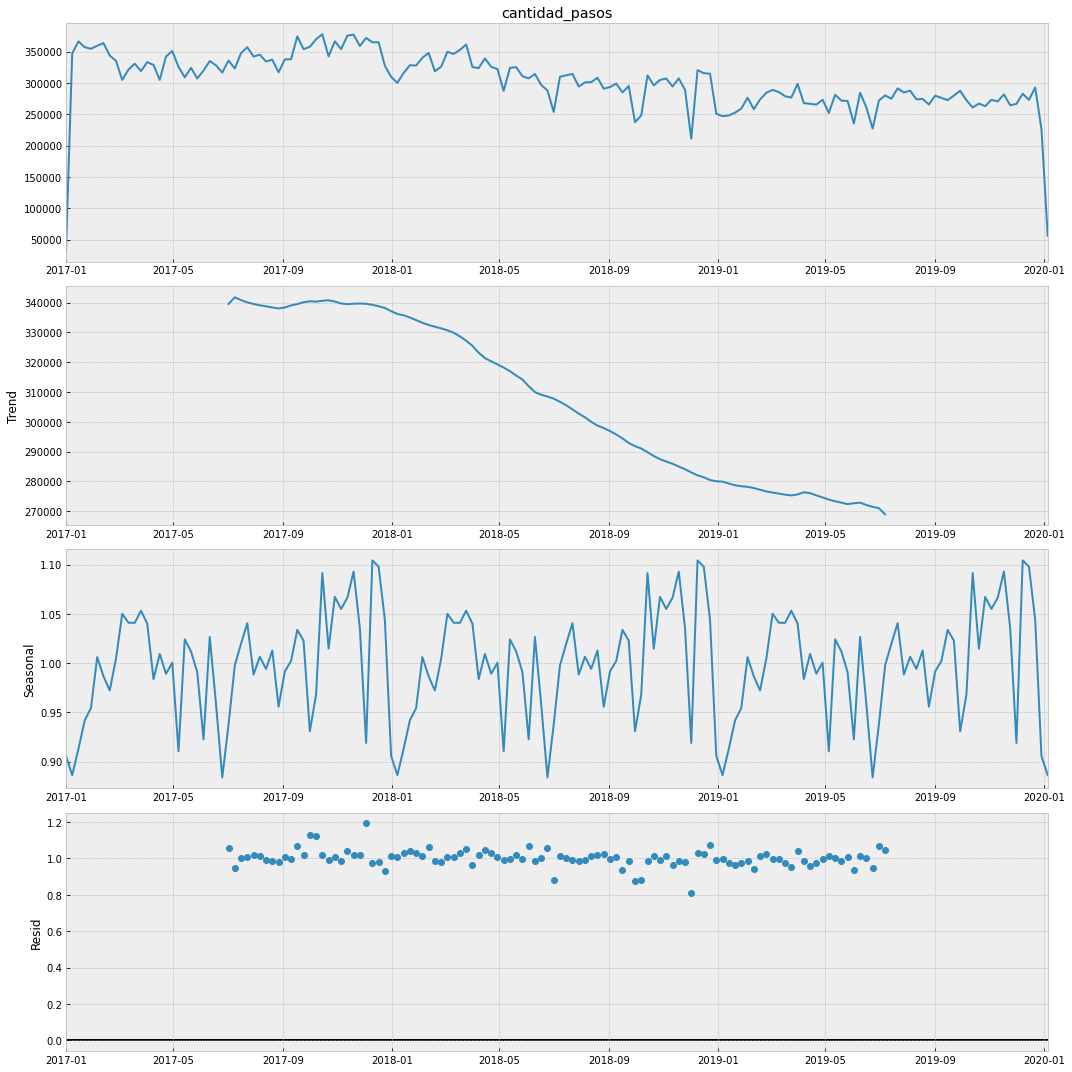

In [99]:
#MULTIPLICATIVO SEMANAL
matplotlib.rcParams['figure.figsize'] = [15,15]
result_multiplicative_semanal.plot()
plt.show()

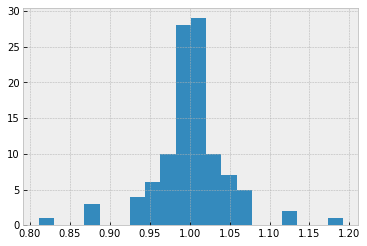

In [100]:
plt.figure(figsize = (6,4))
plt.hist(result_multiplicative_semanal.resid, bins = 20)
plt.show()

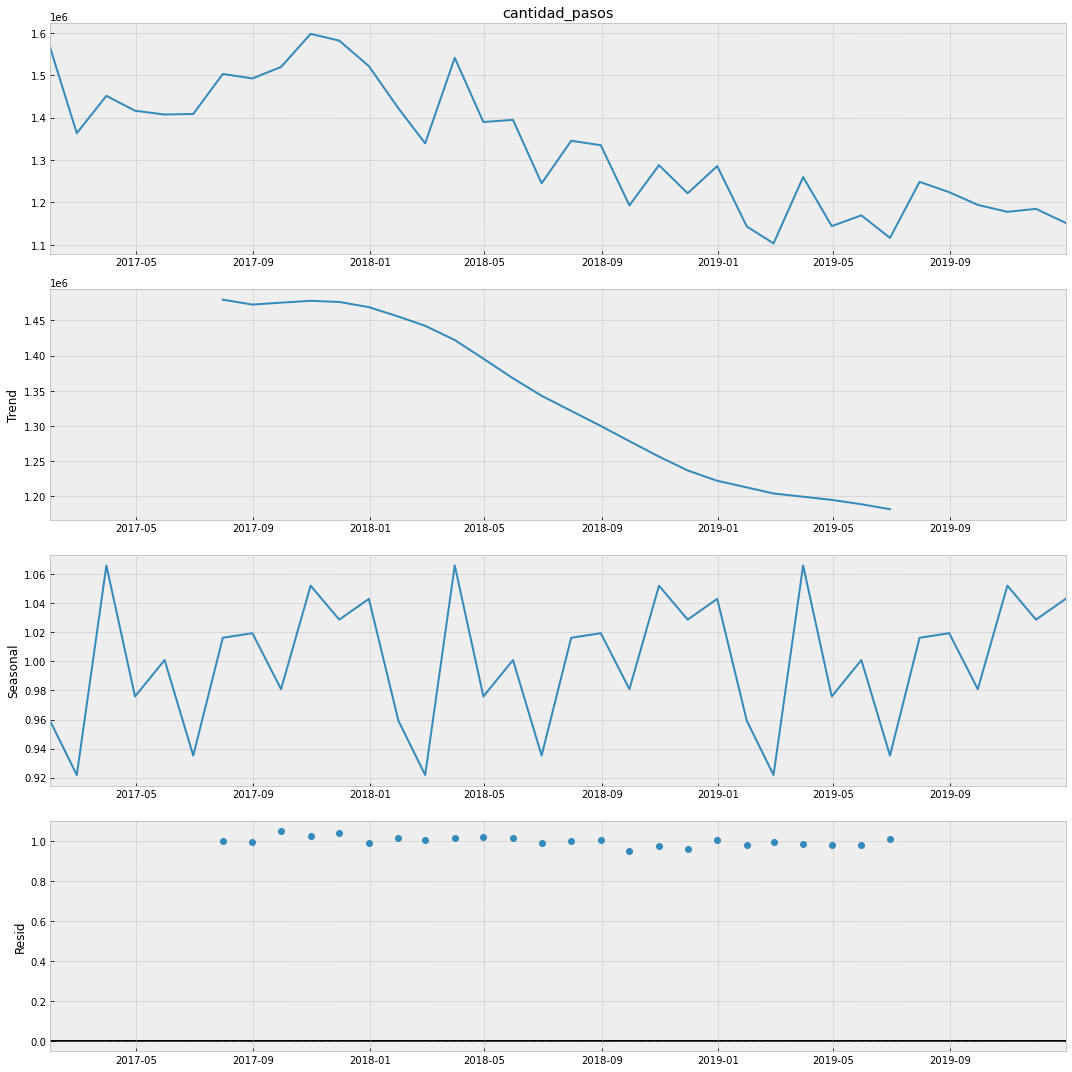

In [101]:
#MULTIPLICATIVO MENSUAL
matplotlib.rcParams['figure.figsize'] = [15,15]
result_multiplicative_mensual.plot()
plt.show()

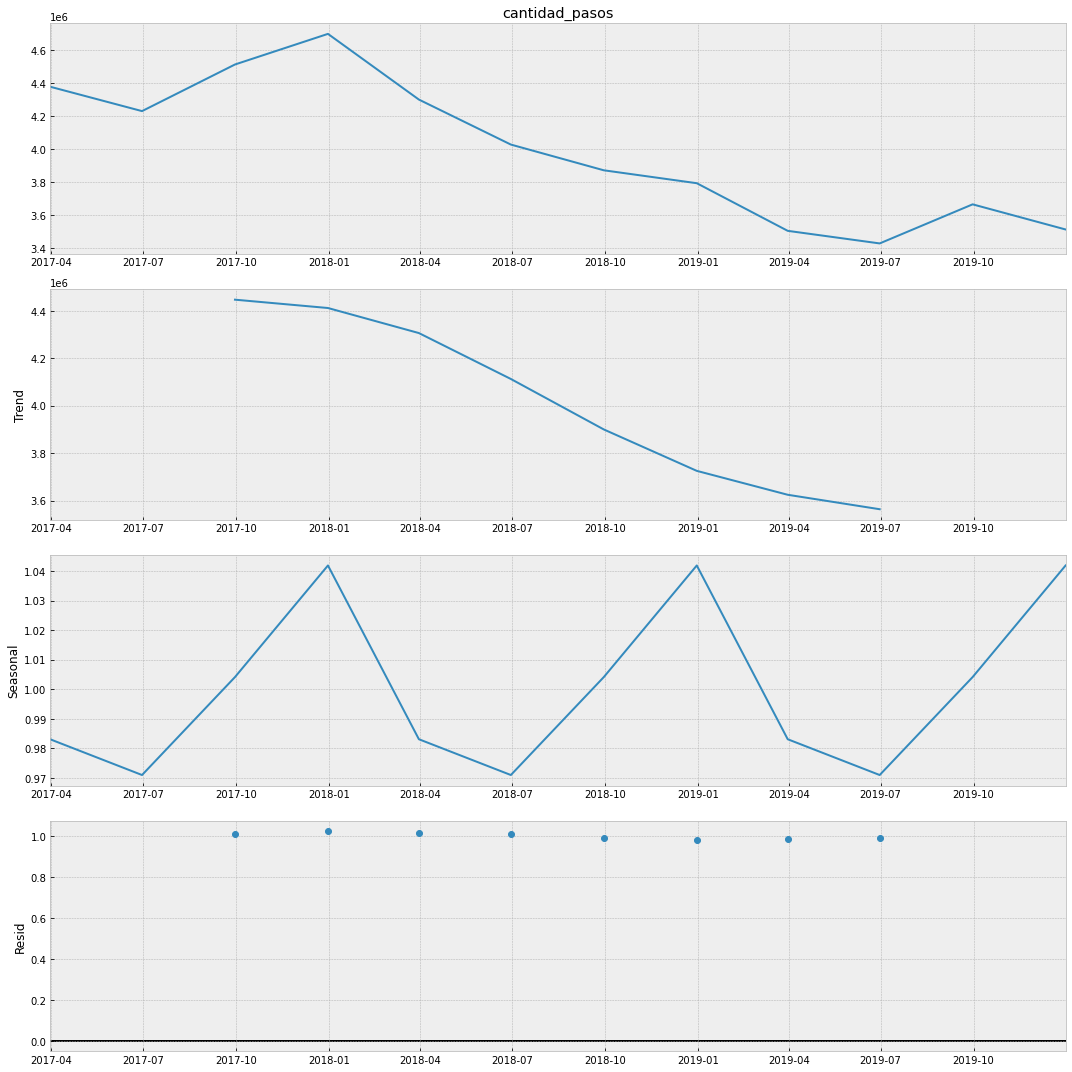

In [102]:
#MULTIPLICATIVO CUATRIMESTRE
matplotlib.rcParams['figure.figsize'] = [15,15]
result_multiplicative_cuatrimestre.plot()
plt.show()

Para las gráficas con el modelo multiplicativo en la tendencia y estacionalidad, los resultados son muy similares, sin embargo en el residuo se enuentra distribuido en torno a 1.

### **Autocorrelacion**

In [103]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [104]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

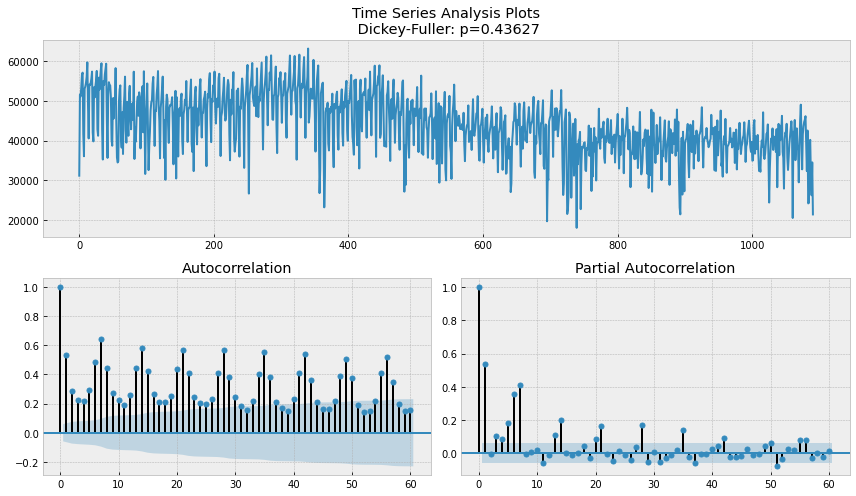

In [105]:
tsplot(df_illia_efectivo.cantidad_pasos, lags=60)

En el gráfico anterior podemos observar cada cuanto se está repitiendo el ciclo por día, en la gráfica de autocorrelación los primeros 7-8 puntos que realizan la primera curva es el primer ciclo que corresponderia a una semana, de esta manera cada semana se estaría obteniendo ese mismo patrón de comportamiento de forma semanal aproximadamente en la serie a lo largo del tiempo.

La serie ahora se encuentra oscilando alrededor de cero, lo cual indica que está estacionaria y el número de picos o correlaciones significativas ha disminuido.

### Parte B: Modelo de Machine Learning

In [106]:
#Creamos una co´pia para empezar a trabajar con el modelo y no afectar los cambios que se pudieran geenerar en el dataset limpio
df_modelo = df_illia_efectivo
df_modelo

fecha  periodo  num_mes        dia  cantidad_pasos
0    2017-01-01     2017        1    Domingo           31183
1    2017-01-02     2017        1      Lunes           51568
2    2017-01-03     2017        1     Martes           51093
3    2017-01-04     2017        1  Miércoles           53332
4    2017-01-05     2017        1     Jueves           56486
...         ...      ...      ...        ...             ...
1086 2019-12-27     2019       12    Viernes           40182
1087 2019-12-28     2019       12     Sábado           30681
1088 2019-12-29     2019       12    Domingo           26259
1089 2019-12-30     2019       12      Lunes           34523
1090 2019-12-31     2019       12     Martes           21447

[1091 rows x 5 columns]

In [107]:
#Convertimos la fecha a valor numérico
df_modelo['fecha_num'] = df_modelo.fecha.map(datetime.datetime.toordinal)
df_modelo

fecha  periodo  num_mes        dia  cantidad_pasos  fecha_num
0    2017-01-01     2017        1    Domingo           31183     736330
1    2017-01-02     2017        1      Lunes           51568     736331
2    2017-01-03     2017        1     Martes           51093     736332
3    2017-01-04     2017        1  Miércoles           53332     736333
4    2017-01-05     2017        1     Jueves           56486     736334
...         ...      ...      ...        ...             ...        ...
1086 2019-12-27     2019       12    Viernes           40182     737420
1087 2019-12-28     2019       12     Sábado           30681     737421
1088 2019-12-29     2019       12    Domingo           26259     737422
1089 2019-12-30     2019       12      Lunes           34523     737423
1090 2019-12-31     2019       12     Martes           21447     737424

[1091 rows x 6 columns]

In [108]:
#Se cambia la fecha a index y dejamos el dataset solo con la fecha convertida y la cantidad de pasos
df_modelo = df_modelo.set_index('fecha')[['fecha_num', 'cantidad_pasos']]
df_modelo

fecha_num  cantidad_pasos
fecha                                
2017-01-01     736330           31183
2017-01-02     736331           51568
2017-01-03     736332           51093
2017-01-04     736333           53332
2017-01-05     736334           56486
...               ...             ...
2019-12-27     737420           40182
2019-12-28     737421           30681
2019-12-29     737422           26259
2019-12-30     737423           34523
2019-12-31     737424           21447

[1091 rows x 2 columns]

In [109]:
#Train test split para los datos de train
df_train = df_modelo.loc['2017-01-01':'2019-09-30']
df_train

fecha_num  cantidad_pasos
fecha                                
2017-01-01     736330           31183
2017-01-02     736331           51568
2017-01-03     736332           51093
2017-01-04     736333           53332
2017-01-05     736334           56486
...               ...             ...
2019-09-26     737328           43110
2019-09-27     737329           44985
2019-09-28     737330           41925
2019-09-29     737331           38348
2019-09-30     737332           37170

[999 rows x 2 columns]

In [110]:
#Train test split para los datos de test (último trimestre del 2019)
df_test= df_modelo.loc['2019-10-01':]
df_test

fecha_num  cantidad_pasos
fecha                                
2019-10-01     737333           39669
2019-10-02     737334           34943
2019-10-03     737335           35054
2019-10-04     737336           43775
2019-10-05     737337           45150
...               ...             ...
2019-12-27     737420           40182
2019-12-28     737421           30681
2019-12-29     737422           26259
2019-12-30     737423           34523
2019-12-31     737424           21447

[92 rows x 2 columns]

### **Modelo Benchmark:** Regresión Lineal

In [111]:
X_train = df_train.fecha_num.values.reshape(-1, 1)
y_train = df_train.cantidad_pasos.values.reshape(-1, 1)
X_test = df_test.fecha_num.values.reshape(-1, 1)
y_test = df_test.cantidad_pasos.values.reshape(-1, 1)

In [112]:
X_train.shape

(999, 1)

In [113]:
y_train.shape

(999, 1)

In [114]:
X_test.shape

(92, 1)

In [115]:
y_test.shape

(92, 1)

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [117]:
#Instanciamos el modelo
model_lr= LinearRegression()

In [118]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [119]:
y_train_pred_bench = model_lr.predict(X_train)
y_test_pred_bench = model_lr.predict(X_test)

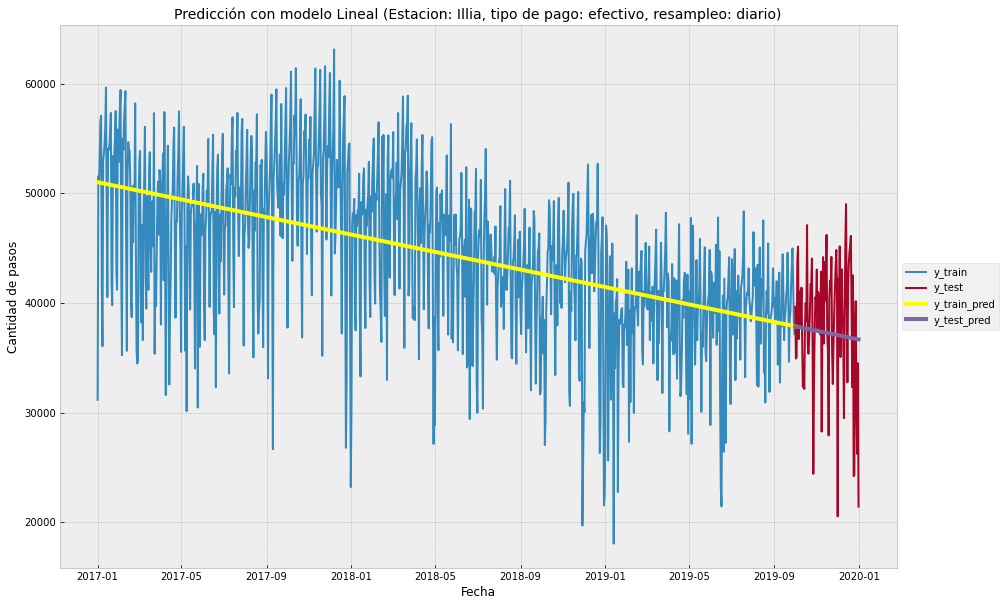

In [120]:
plt.figure(figsize = (15,10))
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred_bench, label = 'y_train_pred', color='yellow', lw = 4)
plt.plot(df_test.index, y_test_pred_bench, label = 'y_test_pred',  lw = 4)
plt.title('Predicción con modelo Lineal (Estacion: Illia, tipo de pago: efectivo, resampleo: diario)',fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [121]:
def evaluar_modelo(modelo, y_train, y_test, y_train_pred_bench, y_test_pred_bench):

    print('El modelo a evaluar: ', modelo)
    ### CALCULAMOS EL ERROR
    
    mse_train = mean_squared_error(y_train, y_train_pred_bench, squared=False)
    mse_test = mean_squared_error(y_test, y_test_pred_bench, squared=False)
    
    mae_train = mean_absolute_error(y_train, y_train_pred_bench)
    mae_test = mean_absolute_error(y_test, y_test_pred_bench)
    
    print(f'Mean squared error en test: {mse_test}')
    print(f'Mean squared error en train: {mse_train}')
    print(f'Mean absolute error en test:  {mae_test}')
    print(f'Mean absolute error en train  {mae_train}')
    
        ### GRAFICAMOS LOS RESULTADOS
      
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred_bench, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred_bench, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred_bench, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Se selecionaron las siguientes métricas de evaluación, debido a que son las más utilizadas para series de tiempo y pertenecen a las métricas de regresión de sklearn:

MAE Mean absolute error: obtenemos las diferencias entre el valor real y valor predicho,donde todos los valores de error de pronóstico están obligados a ser positivos, ya que se calcula en base al valor absoluto de las diferencias.

MSE Mean square error: realiza de igual forma el cálculo de diferencias entre el valor real y valor predicho al cuadrado, también los obliga a ser positivos pero también tiene el efecto de dar más peso a los errores más grandes.

El modelo a evaluar:  Lineal regressor
Mean squared error en test: 5812.203750427146
Mean squared error en train: 6432.242987332533
Mean absolute error en test:  4593.783606265995
Mean absolute error en train  4968.9126064916545


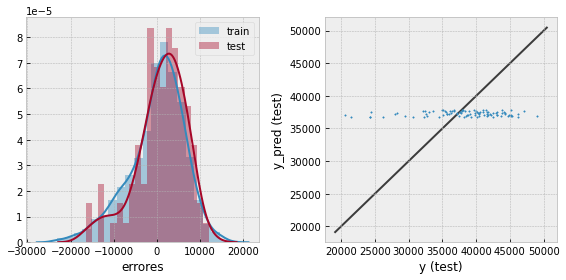

In [122]:
evaluar_modelo('Lineal regressor', y_train, y_test, y_train_pred_bench, y_test_pred_bench)

### **Modelo XG Boost**

In [123]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from xgboost import plot_importance, plot_tree

In [124]:
#Instanciamos el modelo
xgbr = xgb.XGBRegressor()
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [125]:
xgbr.fit(X_train, y_train, verbose=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
# Generamos las predicciones para los valores de test y de de train para graficarlas
y_train_pred_sin_optimización = xgbr.predict(X_train)
y_test_pred_sin_optimización = xgbr.predict(X_test)

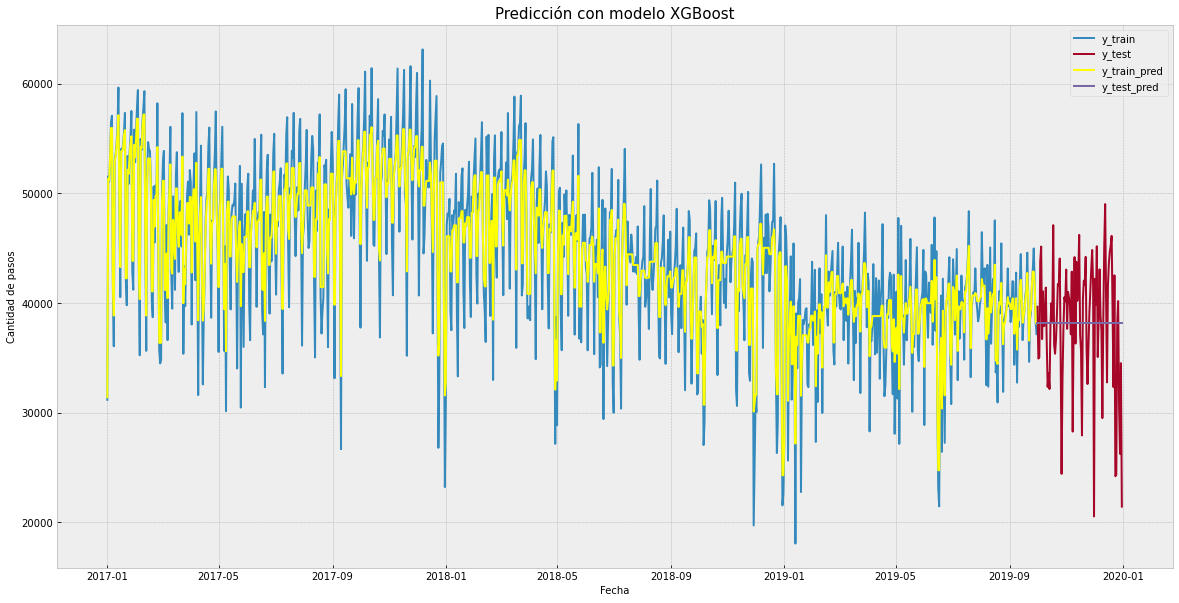

In [127]:
# Generamos el gráfico de comparación de los valores de entrenamiento y de testeo del modelo
plt.figure(figsize = (20,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred_sin_optimización, label = 'y_train_pred', color='yellow')
plt.plot(df_test.index, y_test_pred_sin_optimización, label = 'y_test_pred')
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost',fontsize=15)
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Cantidad de pasos', fontsize=10)
plt.tick_params(labelsize=10)
plt.legend()

El modelo a evaluar:  XGBoost
Mean squared error en test: 5767.070873788929
Mean squared error en train: 2805.3223159002728
Mean absolute error en test:  4402.663722826087
Mean absolute error en train  2048.696827687062


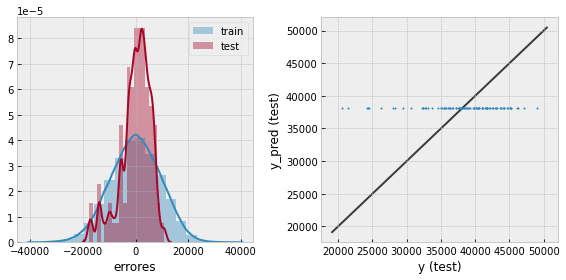

In [128]:
evaluar_modelo('XGBoost', y_train, y_test, y_train_pred_sin_optimización, y_test_pred_sin_optimización)

El modelo a evaluar:  Lineal regressor
Mean squared error en test: 5812.203750427146
Mean squared error en train: 6432.242987332533
Mean absolute error en test:  4593.783606265995
Mean absolute error en train  4968.9126064916545


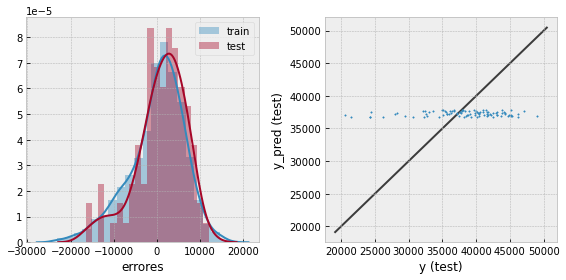

In [129]:
#Modelo Benchmark
evaluar_modelo('Lineal regressor', y_train, y_test, y_train_pred_bench, y_test_pred_bench)

En los resultados de los modelos podemos observar que disminuyeron los errores significativamente aplicando el modelo XGBoost pero únicamente para los datos de entrenamiento para los datos de prueba si disminuyó el error pero en una menor dimensión.

### Optimización del modelo XG Boost

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [131]:
xgb_opt=xgb.XGBRegressor()

In [132]:
param_grid = {'nthread':[1, 2, 3, 4, 5], 
              'learning_rate': np.arange(.05, 1, .05),
              'max_depth': np.arange(1,10),
              'min_child_weight': [3, 4, 5, 6, 7, 8],
              'subsample': np.arange(.05, 1, .05),
              'colsample_bytree': np.arange(.05, 1, .05),
              'n_estimators': [100, 200, 300, 400, 500]}
param_grid

{'nthread': [1, 2, 3, 4, 5],
 'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_child_weight': [3, 4, 5, 6, 7, 8],
 'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'colsample_bytree': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'n_estimators': [100, 200, 300, 400, 500]}

In [133]:
xgb_rs = RandomizedSearchCV(xgb_opt, param_grid, n_iter=100, random_state=0, cv=5, scoring='neg_mean_absolute_error',verbose=True, n_jobs=-1)

In [134]:
xgb_rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
   

In [135]:
xgb_rs.best_score_

-4844.501009422111

In [136]:
xgb_rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.6000000000000001, max_delta_step=0, max_depth=1,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.15000000000000002, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [137]:
#Definir el modelo con los hiperparámetros obtenidos
xgb_opt = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.6000000000000001, max_delta_step=0, max_depth=1,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=2, nthread=1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.15000000000000002, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [138]:
xgb_opt.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.6000000000000001, max_delta_step=0, max_depth=1,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, nthread=1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.15000000000000002, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [139]:
#Predecir
y_train_pred_opt = xgb_opt.predict(X_train)
y_test_pred_opt = xgb_opt.predict(X_test)

El modelo a evaluar:  XGBoost (Optimización)
Mean squared error en test: 5896.3241343556165
Mean squared error en train: 5917.7908371378535
Mean absolute error en test:  4352.497282608696
Mean absolute error en train  4506.828942223474


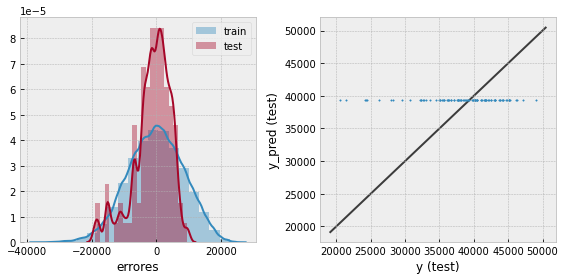

In [140]:
evaluar_modelo('XGBoost (Optimización)', y_train, y_test, y_train_pred_opt, y_test_pred_opt)

El modelo a evaluar:  XGBoost (Sin optimización)
Mean squared error en test: 5767.070873788929
Mean squared error en train: 2805.3223159002728
Mean absolute error en test:  4402.663722826087
Mean absolute error en train  2048.696827687062


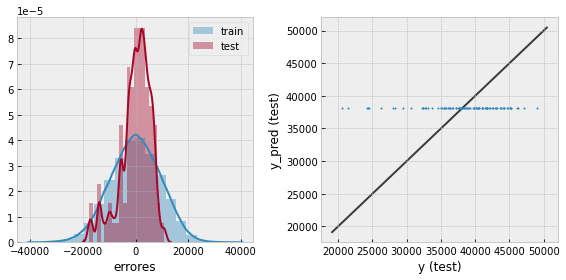

In [141]:
evaluar_modelo('XGBoost (Sin optimización)', y_train, y_test, y_train_pred_sin_optimización, y_test_pred_sin_optimización)

Los resultados del modelo optimizado contra el modelo sin optimizar no son los esperados, ya que únicamente mejoró la métrica en el promedio absoluto (Mean absolute error) en test, que es donde si s epuede observar una majora en el desempeño, sin embargo no es el mejor desempeño que esperabamos. En la gráfica podemos ver que en la distribución de los errores tampoco hay cambios significativos.

***¿Qué información está usando el modelo para predecir?***  En la gráfica de dispersion podemos ver que el valor predicho parece ser un valor único que se encuentra entre los 40,000 y 35,000 por lo cual parecería ser que el modelo puede estar tomando el valor anterior al de su predicción o un promedio general para todos los valores predichos.

### Optimización del modelo - Agregar atributos

Buscando una mejora en el desempeño del modelo, vamos a agregar más atributos como el día, mes y periodo.

In [142]:
df_illia_efectivo

fecha  periodo  num_mes        dia  cantidad_pasos  fecha_num
0    2017-01-01     2017        1    Domingo           31183     736330
1    2017-01-02     2017        1      Lunes           51568     736331
2    2017-01-03     2017        1     Martes           51093     736332
3    2017-01-04     2017        1  Miércoles           53332     736333
4    2017-01-05     2017        1     Jueves           56486     736334
...         ...      ...      ...        ...             ...        ...
1086 2019-12-27     2019       12    Viernes           40182     737420
1087 2019-12-28     2019       12     Sábado           30681     737421
1088 2019-12-29     2019       12    Domingo           26259     737422
1089 2019-12-30     2019       12      Lunes           34523     737423
1090 2019-12-31     2019       12     Martes           21447     737424

[1091 rows x 6 columns]

In [143]:
#Ponemos como index la fecha
df_atributos = df_illia_efectivo.set_index('fecha')
df_atributos

periodo  num_mes        dia  cantidad_pasos  fecha_num
fecha                                                             
2017-01-01     2017        1    Domingo           31183     736330
2017-01-02     2017        1      Lunes           51568     736331
2017-01-03     2017        1     Martes           51093     736332
2017-01-04     2017        1  Miércoles           53332     736333
2017-01-05     2017        1     Jueves           56486     736334
...             ...      ...        ...             ...        ...
2019-12-27     2019       12    Viernes           40182     737420
2019-12-28     2019       12     Sábado           30681     737421
2019-12-29     2019       12    Domingo           26259     737422
2019-12-30     2019       12      Lunes           34523     737423
2019-12-31     2019       12     Martes           21447     737424

[1091 rows x 5 columns]

In [144]:
#Creamos variables dummy
df_atributos_dum= pd.get_dummies(df_atributos, columns=['periodo','num_mes','dia'], sparse=True)
df_atributos_dum

cantidad_pasos  fecha_num  periodo_2017  periodo_2018  \
fecha                                                               
2017-01-01           31183     736330             1             0   
2017-01-02           51568     736331             1             0   
2017-01-03           51093     736332             1             0   
2017-01-04           53332     736333             1             0   
2017-01-05           56486     736334             1             0   
...                    ...        ...           ...           ...   
2019-12-27           40182     737420             0             0   
2019-12-28           30681     737421             0             0   
2019-12-29           26259     737422             0             0   
2019-12-30           34523     737423             0             0   
2019-12-31           21447     737424             0             0   

            periodo_2019  num_mes_1  num_mes_2  num_mes_3  num_mes_4  \
fecha                                                                  
2017-01-01             0          1          0          0          0   
2017-01-02             0          1          0          0          0   
2017-01-03             0          1          0          0          0   
2017-01-04             0          1          0          0          0   
2017-01-05             0          1          0          0          0   
...                  ...        ...        ...        ...        ...   
2019-12-27             1          0          0          0          0   
2019-12-28             1          0          0          0          0   
2019-12-29             1          0          0          0          0   
2019-12-30             1          0          0          0          0   
2019-12-31             1          0          0          0          0   

            num_mes_5  ...  num_mes_10  num_mes_11  num_mes_12  dia_Domingo  \
fecha                  ...                                                    
2017-01-01          0  ...           0           0           0            1   
2017-01-02          0  ...           0           0           0            0   
2017-01-03          0  ...           0           0           0            0   
2017-01-04          0  ...           0           0           0            0   
2017-01-05          0  ...           0           0           0            0   
...               ...  ...         ...         ...         ...          ...   
2019-12-27          0  ...           0           0           1            0   
2019-12-28          0  ...           0           0           1            0   
2019-12-29          0  ...           0           0           1            1   
2019-12-30          0  ...           0           0           1            0   
2019-12-31          0  ...           0           0           1            0   

            dia_Jueves  dia_Lunes  dia_Martes  dia_Miércoles  dia_Sábado  \
fecha                                                                      
2017-01-01           0          0           0              0           0   
2017-01-02           0          1           0              0           0   
2017-01-03           0          0           1              0           0   
2017-01-04           0          0           0              1           0   
2017-01-05           1          0           0              0           0   
...                ...        ...         ...            ...         ...   
2019-12-27           0          0           0              0           0   
2019-12-28           0          0           0              0           1   
2019-12-29           0          0           0              0           0   
2019-12-30           0          1           0              0           0   
2019-12-31           0          0           1              0           0   

            dia_Viernes  
fecha                    
2017-01-01            0  
2017-01-02            0  
2017-01-03            0  
2017-01-04            0  
2017

In [145]:
#Trin test split
df_train_atributos = df_atributos_dum.loc['2017-01-01':'2019-09-30']
df_train_atributos.shape

(999, 24)

In [146]:
df_test_atributos = df_atributos_dum.loc['2019-10-01':]
df_test_atributos.shape

(92, 24)

In [147]:
X_train = df_train_atributos.drop(columns='cantidad_pasos')
X_test = df_test_atributos.drop(columns='cantidad_pasos')

In [148]:
y_train = df_train_atributos.cantidad_pasos.values.reshape(-1, 1)
y_test = df_test_atributos.cantidad_pasos.values.reshape(-1, 1)

In [149]:
xgb_atr = xgb.XGBRegressor()
xgb_atr

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [150]:
#Entrenamiento
xgb_atr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
#Predicción
y_train_pred_atr = xgb_atr.predict(X_train)
y_test_pred_atr= xgb_atr.predict(X_test)

In [152]:
from xgboost import plot_importance, plot_tree

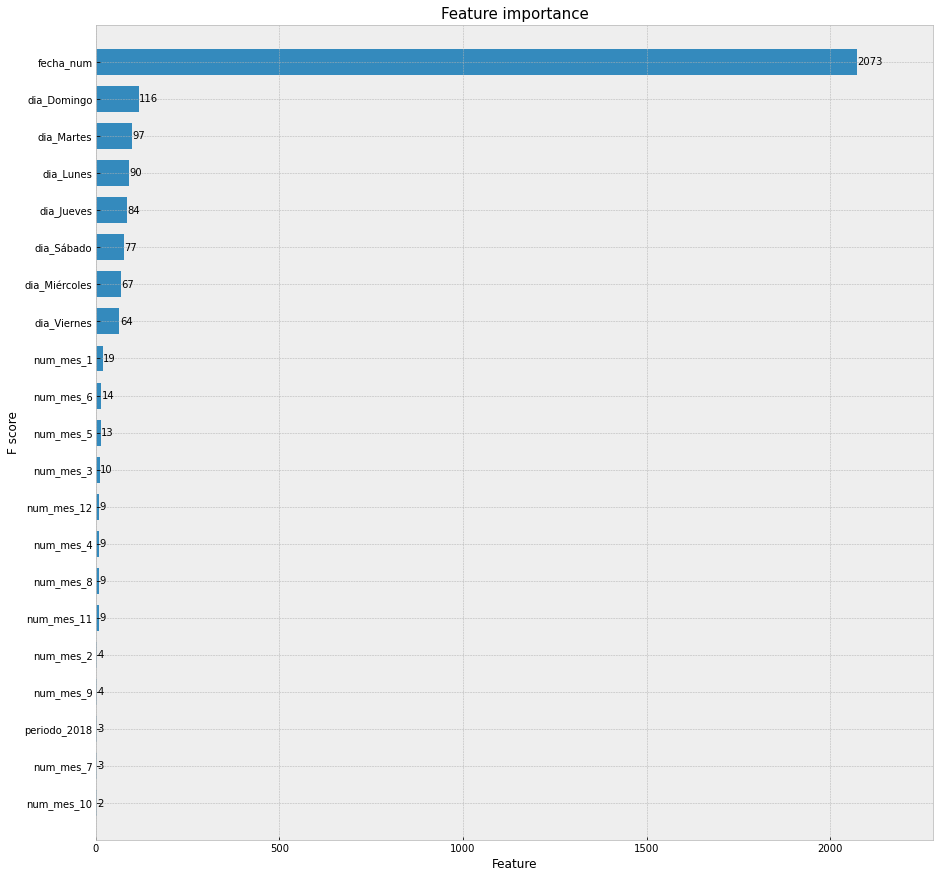

In [153]:
plot_importance(xgb_atr, height=.7,show_values=True)
plt.title('Feature importance',fontsize=15)
plt.xlabel('Feature')
plt.ylabel('F score')
plt.tick_params(labelsize=10)
plt.show()

En la gráfica de importancia de los atributos, observamos que el atributo con más importancia es el de la fecha y posteriormente los días de la semana, los cuales veíamos anteriormente que tenian un comportamiento ciclico.

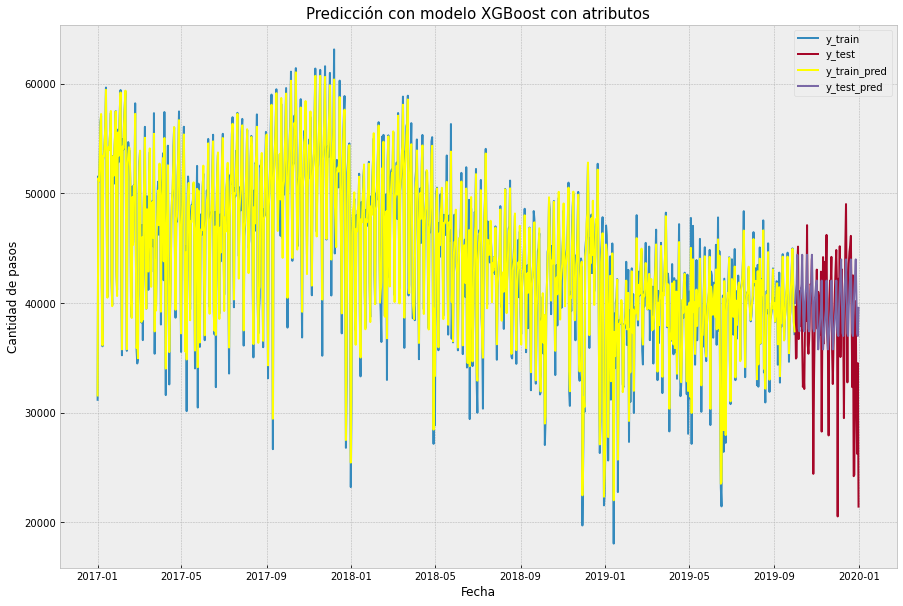

In [154]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred_atr, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred_atr, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost con atributos',fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.tick_params(labelsize=10)
plt.legend()

El modelo a evaluar:  XGBoost (Múltiples parametros)
Mean squared error en test: 5657.380931635399
Mean squared error en train: 1194.5329265066541
Mean absolute error en test:  4074.9021739130435
Mean absolute error en train  840.0972554585836


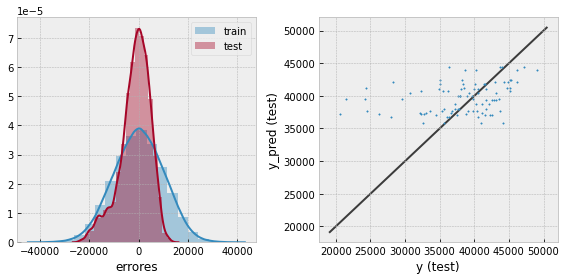

In [155]:
evaluar_modelo('XGBoost (Múltiples parametros)', y_train, y_test, y_train_pred_atr, y_test_pred_atr)

El modelo a evaluar:  XGBoost (Optimización)
Mean squared error en test: 5896.3241343556165
Mean squared error en train: 5917.7908371378535
Mean absolute error en test:  4352.497282608696
Mean absolute error en train  4506.828942223474


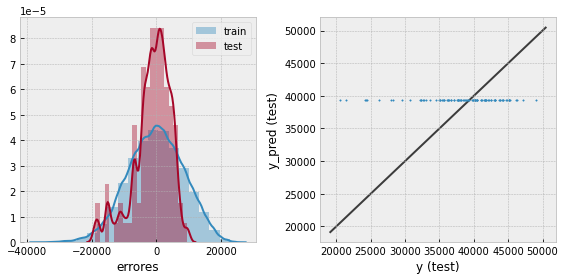

In [156]:
evaluar_modelo('XGBoost (Optimización)', y_train, y_test, y_train_pred_opt, y_test_pred_opt)

El modelo a evaluar:  Lineal regressor
Mean squared error en test: 5812.203750427146
Mean squared error en train: 6432.242987332533
Mean absolute error en test:  4593.783606265995
Mean absolute error en train  4968.9126064916545


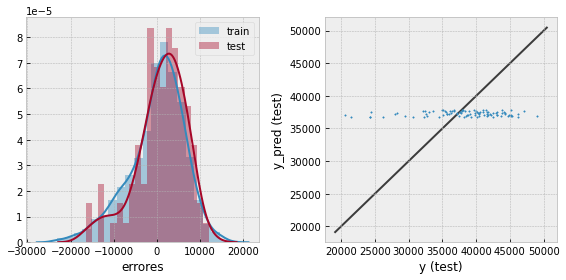

In [157]:
evaluar_modelo('Lineal regressor', y_train, y_test, y_train_pred_bench, y_test_pred_bench)

Los resultados del modelo que incluye los atributos mejoro bastante a la anterior, los errores se ven mas distribuidos, el error en los datos de entrenamiento bajo más que en los datos de prueba. También se observa que entre mayor es la cantidad de pasos el modelo acierta mejor que cuando esta entre los 20,000 a 25,000 o por encima de los 45,000 pasos. Ambos modelos tienen mejor desempeño que nuestro modelo benchmark de regresion lineal.

### Optimización de hiperparámetros con atributos

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [159]:
xgb_opt_art=xgb.XGBRegressor()

In [160]:
param_atr = {'nthread':[1, 2, 3, 4, 5], 
              'learning_rate': np.arange(.05, 1, .05),
              'max_depth': np.arange(1,10),
              'min_child_weight': [3, 4, 5, 6, 7, 8],
              'subsample': np.arange(.05, 1, .05),
              'colsample_bytree': np.arange(.05, 1, .05),
              'n_estimators': [100, 200, 300, 400, 500]}
param_atr

{'nthread': [1, 2, 3, 4, 5],
 'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_child_weight': [3, 4, 5, 6, 7, 8],
 'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'colsample_bytree': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'n_estimators': [100, 200, 300, 400, 500]}

In [161]:
xgb_rs_art = RandomizedSearchCV(xgb_opt_art, param_atr,n_iter=100, random_state=0, cv=5, scoring='neg_mean_absolute_error', 
                            verbose=True, n_jobs=-1, refit=True)

In [162]:
xgb_rs_art.fit(X_train, y_train,verbose=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   51.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
   

In [163]:
xgb_rs_art.best_score_

-3473.6778716630024

In [164]:
xgb_rs_art.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.15000000000000002, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.35000000000000003, max_delta_step=0, max_depth=6,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=3, nthread=3, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.9500000000000001, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [165]:
#Definir el modelo con los hiperparámetros obtenidos
xgb_final = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.15000000000000002, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.35000000000000003, max_delta_step=0, max_depth=6,
             min_child_weight=8, monotone_constraints='()',
             n_estimators=400, n_jobs=3, nthread=3, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.9500000000000001, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [166]:
xgb_final.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.15000000000000002, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.35000000000000003, max_delta_step=0, max_depth=6,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=3, nthread=3, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.9500000000000001, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [167]:
#Predecir
y_train_pred_final = xgb_final.predict(X_train)
y_test_pred_final = xgb_final.predict(X_test)

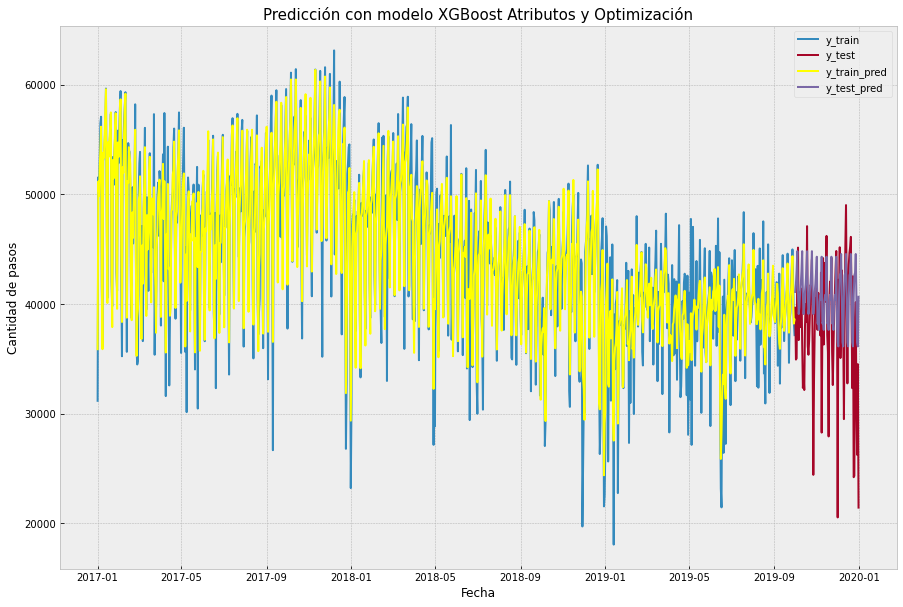

In [168]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(df_train.index, df_train.cantidad_pasos, label = 'y_train')
plt.plot(df_test.index, df_test.cantidad_pasos, label = 'y_test')
plt.plot(df_train.index, y_train_pred_final, label = 'y_train_pred', color='yellow', lw = 2)
plt.plot(df_test.index, y_test_pred_final, label = 'y_test_pred',  lw = 2)
#Formato de la gráfica
plt.title('Predicción con modelo XGBoost Atributos y Optimización',fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.tick_params(labelsize=10)
plt.legend()

El modelo a evaluar:  XGBoost (Atributos y Optimización)
Mean squared error en test: 5933.069557689111
Mean squared error en train: 2856.039725572344
Mean absolute error en test:  4218.617866847826
Mean absolute error en train  1958.8572771990741


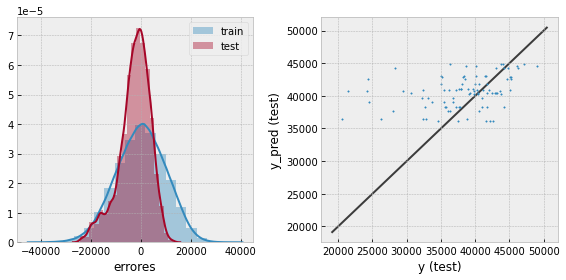

In [169]:
evaluar_modelo('XGBoost (Atributos y Optimización)', y_train, y_test, y_train_pred_final, y_test_pred_final)

El modelo a evaluar:  XGBoost (Múltiples parámetros)
Mean squared error en test: 5657.380931635399
Mean squared error en train: 1194.5329265066541
Mean absolute error en test:  4074.9021739130435
Mean absolute error en train  840.0972554585836


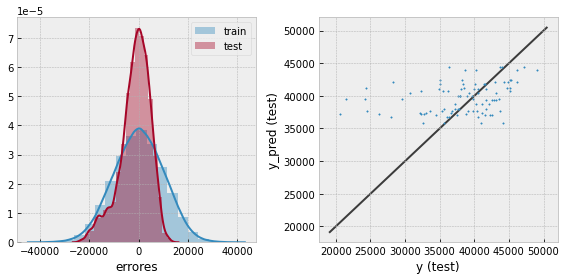

In [170]:
evaluar_modelo('XGBoost (Múltiples parámetros)', y_train, y_test, y_train_pred_atr, y_test_pred_atr)

El modelo a evaluar:  Lineal regressor
Mean squared error en test: 5812.203750427146
Mean squared error en train: 6432.242987332533
Mean absolute error en test:  4593.783606265995
Mean absolute error en train  4968.9126064916545


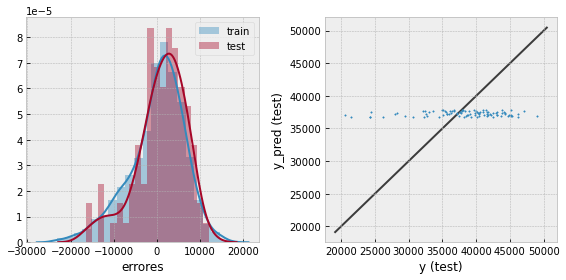

In [171]:
evaluar_modelo('Lineal regressor', y_train, y_test, y_train_pred_bench, y_test_pred_bench)

Con la optimización de los atributos la precisión del modelo es similar pero menor a la obtenida anteriormente con el modelo sin optimizar,sin embargo sigue siendo mejor el resultado que el modelo benchmark, por lo cual, el modelo que elegiría seria el XGBoost sin la optimización, uno de los temas que me gustaría seguir investigando más a fondo son los hiperparámetros del XGBoost, considero que se puede generar mejores resultados para este modelo con un detalle más a fondo para la optimización.

### Predicción 2020 con Prophet

In [172]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [173]:
df_illia_efectivo

fecha  periodo  num_mes        dia  cantidad_pasos  fecha_num
0    2017-01-01     2017        1    Domingo           31183     736330
1    2017-01-02     2017        1      Lunes           51568     736331
2    2017-01-03     2017        1     Martes           51093     736332
3    2017-01-04     2017        1  Miércoles           53332     736333
4    2017-01-05     2017        1     Jueves           56486     736334
...         ...      ...      ...        ...             ...        ...
1086 2019-12-27     2019       12    Viernes           40182     737420
1087 2019-12-28     2019       12     Sábado           30681     737421
1088 2019-12-29     2019       12    Domingo           26259     737422
1089 2019-12-30     2019       12      Lunes           34523     737423
1090 2019-12-31     2019       12     Martes           21447     737424

[1091 rows x 6 columns]

In [174]:
df_atributos_future = df_illia_efectivo.drop(columns=['fecha_num','periodo','num_mes','dia']).rename(columns={'fecha':'ds', 
                                                                                                              'cantidad_pasos':'y'})
df_atributos_future

ds      y
0    2017-01-01  31183
1    2017-01-02  51568
2    2017-01-03  51093
3    2017-01-04  53332
4    2017-01-05  56486
...         ...    ...
1086 2019-12-27  40182
1087 2019-12-28  30681
1088 2019-12-29  26259
1089 2019-12-30  34523
1090 2019-12-31  21447

[1091 rows x 2 columns]

In [175]:
pr_model = Prophet()

In [176]:
pr_model.fit(df_atributos_future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [177]:
data_future = pr_model.make_future_dataframe(periods=365)
#data_future.head()

In [178]:
#data_future.tail()

In [179]:
forecast= pr_model.predict(data_future)
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2017-01-01  49282.393194  32935.181320  44798.338629  49282.393194   
1    2017-01-02  49277.935186  38537.752356  50634.310855  49277.935186   
2    2017-01-03  49273.477178  39512.675473  52081.391074  49273.477178   
3    2017-01-04  49269.019170  41620.900345  54410.403733  49269.019170   
4    2017-01-05  49264.561162  42749.693455  55056.882092  49264.561162   
...         ...           ...           ...           ...           ...   
1451 2020-12-26  34014.608898  23132.879516  36250.127217  32026.629329   
1452 2020-12-27  34006.007313  18056.403422  31088.179877  32010.332683   
1453 2020-12-28  33997.405727  23943.414769  36839.929025  31994.036037   
1454 2020-12-29  33988.804142  24952.019615  37399.026423  31977.871443   
1455 2020-12-30  33980.202556  26709.519350  38986.369623  31958.258264   

       trend_upper  additive_terms  additive_terms_lower  \
0     49282.393194   -10512.236326         -10512.236326   
1     49277.935186    -4620.055636          -4620.055636   
2     49273.477178    -3552.900942          -3552.900942   
3     49269.019170    -1708.033921          -1708.033921   
4     49264.561162     -540.994068           -540.994068   
...            ...             ...                   ...   
1451  36006.940906    -4437.973896          -4437.973896   
1452  36001.796514    -9367.700522          -9367.700522   
1453  35996.652122    -3663.437241          -3663.437241   
1454  35999.968336    -2793.113871          -2793.113871   
1455  36000.478365    -1150.583682          -1150.583682   

      additive_terms_upper       weekly  weekly_lower  weekly_upper  \
0            -10512.236326 -7053.102398  -7053.102398  -7053.102398   
1             -4620.055636 -1049.025277  -1049.025277  -1049.025277   
2             -3552.900942    88.453425     88.453425     88.453425   
3             -1708.033921  1962.362614   1962.362614   1962.362614   
4              -540.994068  3118.127119   3118.127119   3118.127119   
...                    ...          ...           ...           ...   
1451          -4437.973896 -2452.141538  -2452.141538  -2452.141538   
1452          -9367.700522 -7053.102398  -7053.102398  -7053.102398   
1453          -3663.437241 -1049.025277  -1049.025277  -1049.025277   
1454          -2793.113871    88.453425     88.453425     88.453425   
1455          -1150.583682  1962.362614   1962.362614   1962.362614   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -3459.133928  -3459.133928  -3459.133928                   0.0   
1    -3571.030358  -3571.030358  -3571.030358                   0.0   
2    -3641.354368  -3641.354368  -3641.354368                   0.0   
3    -3670.396535  -3670.396535  -3670.396535                   0.0   
4    -3659.121187  -3659.121187  -3659.121187                   0.0   
...           ...           ...           ...                   ...   
1451 -1985.832358  -1985.832358  -1985.832358                   0.0   
1452 -2314.598124  -2314.598124  -2314.598124                   0.0   
1453 -2614.411964  -2614.411964  -2614.411964                   0.0   
1454 -2881.567296  -2881.567296  -2881.567296                   0.0   
1455 -3112.946296  -3112.946296  -3112.946296                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  38770.156868  
1                            0.0                         0.0  44657.879551  
2                            0.0                         0.0  45720.576236  
3                            0.0                         0.0  47560.985250  
4                            0.0                         0.0  48723.567094  
...                          ...                         ...           ...  
1451                         0.0                         0.0  29576.635002  
1452                         0.0                         0.0  24638.3

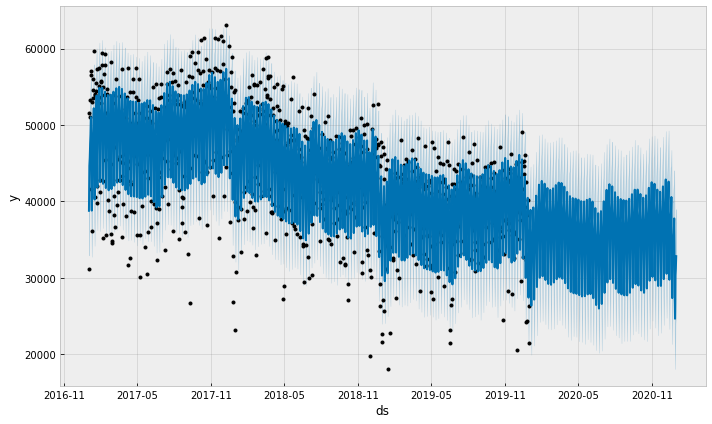

In [180]:
pr_model.plot(forecast);

Como podemos ver en la gráfica anterior, el modelo logra captar la tendencia de los años anteriores y la replica para el año 2020. 

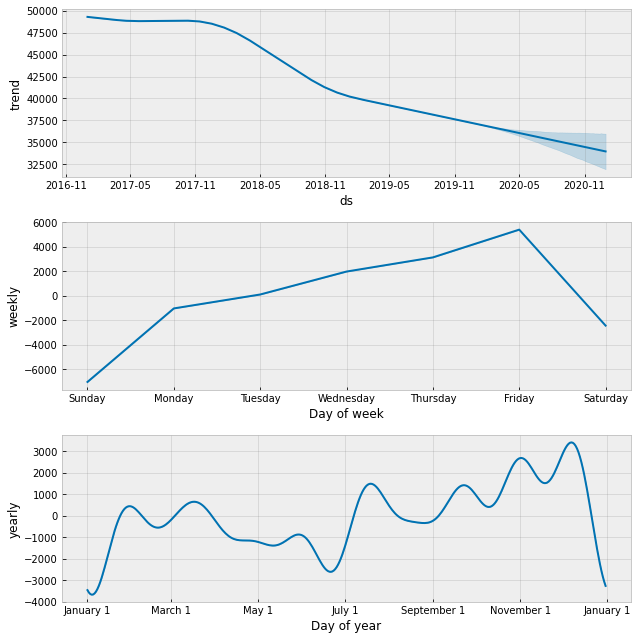

In [181]:
pr_model.plot_components(forecast);

Como podemos ver, los componentes de la serie en nuestro pronóstico van de acuerdo a lo que veiamos anteriormente en el análisis exploratorio, la tendencia va a la baja y el comportamiento del tráfico a lo largo de la semana también va de acuerdo con los datos ciclicos que veíamos anteriormente.

### Parte C: Investigación

***¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?***

La forma en la que incorporaría información sobre el tipo de vehiculo, forma de pago, etc sería mediante el uso de variables dummy como se realizó en la etapa de la optimización de los modelos con los atributos, considero que la predicción mejoraría ya que mejoró bastante unicamente incluyendo el periodo, dia de la semana y el mes por lo que sería una buena opción para probar posteriormente.

***¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?***

In [182]:
dataset_estaciones =  dataset_completo[['fecha','periodo', 'dia','cantidad_pasos','estacion']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'),'periodo', 'dia','estacion'])\
        .sum().reset_index()
dataset_estaciones

fecha  periodo      dia    estacion  cantidad_pasos
0    2017-01-01     2017  Domingo     Alberdi            9638
1    2017-01-01     2017  Domingo  Avellaneda           99631
2    2017-01-01     2017  Domingo  Dellepiane           62026
3    2017-01-01     2017  Domingo       Illia           45478
4    2017-01-01     2017  Domingo      Retiro            2532
...         ...      ...      ...         ...             ...
7848 2019-12-31     2019   Martes       Illia           43010
7849 2019-12-31     2019   Martes         PDB           11802
7850 2019-12-31     2019   Martes      Retiro            1151
7851 2019-12-31     2019   Martes    Salguero            2261
7852 2019-12-31     2019   Martes   Sarmiento            2175

[7853 rows x 5 columns]

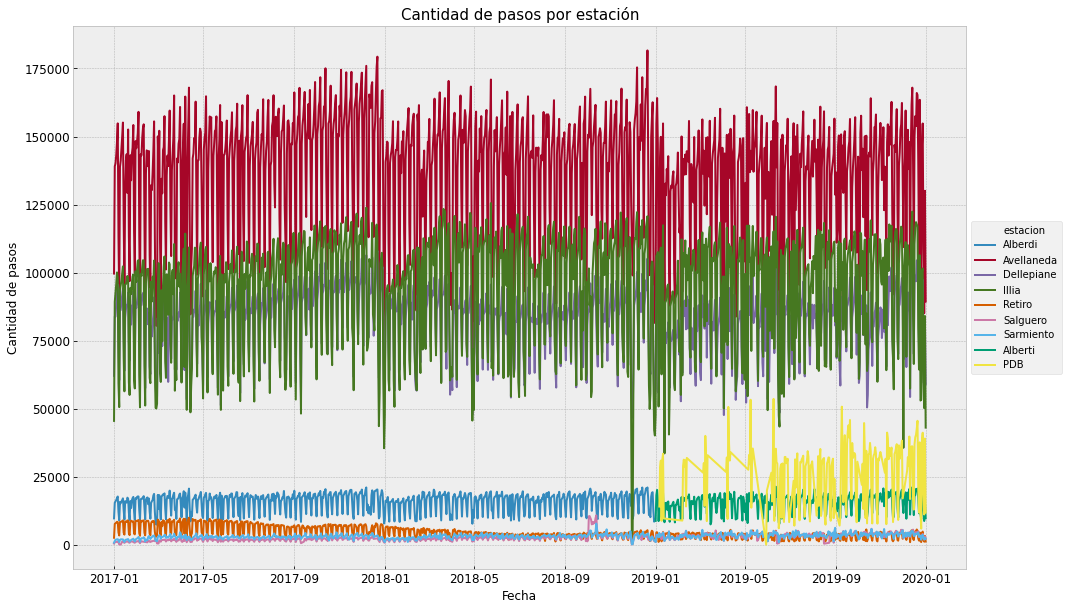

In [183]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_estaciones, x='fecha', y='cantidad_pasos', hue="estacion")

#Formato de la gráfica
plt.title('Cantidad de pasos por estación',fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=12)
plt.show()

En la gráfica podemos observar que la estación Illia y Avellaneda son las estaciones con mayor cantidad de pasos de automóviles, en ambas se puede observar un comportamiento ciclico como el que vimos anteriormente, de igual forma se puede observar este comportamiento en Alberdi, y las otras parecen tener comportamientos imilares, aunque no se puede observar claramente ya que tienen una menor cantidad de pasos, excepto por la estación PDB, la cual tiene un comportamiento muy diferente a las demás, como vimos anteriormente esta es la única estación en la que circulan mayor cantidad de automoviles pesados que livianos y los datos se ven a partir de 2019 por lo que puede significar que se trata de una estación nueva y de acceso a una zona industrial por la cual circulan en su mayoría autos pesados. 

***¿Hay algo que te gustaría investigar o probar?***

Me gustaría probar la predicción del dataset con mayor cantidad de estaciones para ver como se comporta y considero que una variable importante en la predicción también es el tiempo, por lo que me gustaría investigar sobre como se puede incorporar la hora como atributo para la predicción.